In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf_sets_r,Kuramoto_2nd_mf,Kuramoto_1st_mf_sets_r,Kuramoto_1st_mf
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_0 as mf2_sets_0
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
from TO_sim.Integrator import RK4

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r
from scipy.integrate import solve_ivp,odeint
import seaborn as sns
max_c = 3e-4

In [ ]:
m = 6
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 6
seed = 100
N = 500
theta_init, omega, Kc = Normal(N, 0, 1, seed=seed)
N_set = 50
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set, 1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set, 1))*np.zeros_like(omega))
theta_init, omega_, Kc = Normal(N, 0, 1, seed=10)

for i in range(N_set):
    theta_init, omega, Kc = Normal(N, 0, 1, seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega_
    theta_sets[i] = theta_init
omega_sets = omega_sets_temp

# m = 10
t_end = 2000
dt = 0.01
t = np.arange(0, t_end, dt)
theta_set, dtheta_set, rs = mf2_sets_TLO(m_set=m, N=N, K=K, t_array=t, p_theta=theta_sets,
                                         p_dtheta=0*omega_sets, p_omega=omega_sets, result_time=int((t_end-350)*(1/dt)))

In [60]:
dtheta_set.shape

(3501, 50, 500)

In [71]:
rs = rs[::10]

In [82]:
rs.shape

(20000, 50, 1)

In [83]:
rs_ = rs.T[0].T
sum_time = 2000
r_mean = np.array([np.mean(rs_[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs_[i:i+sum_time], axis=0)
                 for i in range(len(t)-sum_time)])
dtheta_c = np.cumsum(dtheta_set, axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

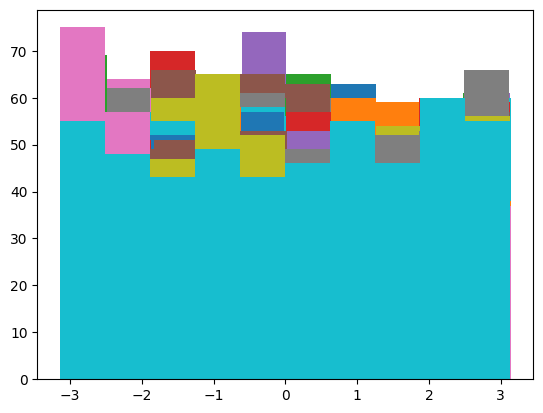

In [73]:
for theta in theta_sets:
    plt.hist(theta)

In [74]:
rs.shape

(20000, 50, 1)

(0.0, 500.0)

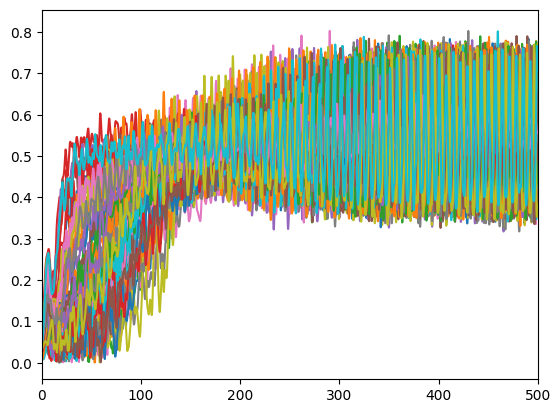

In [76]:
# plt.plot(t[sum_time:], r_mean)
for i in range(N_set):
    plt.plot(t[::10],rs.T[0].T[:,i])
plt.xlim(0,500)

In [77]:
t = t[::10]

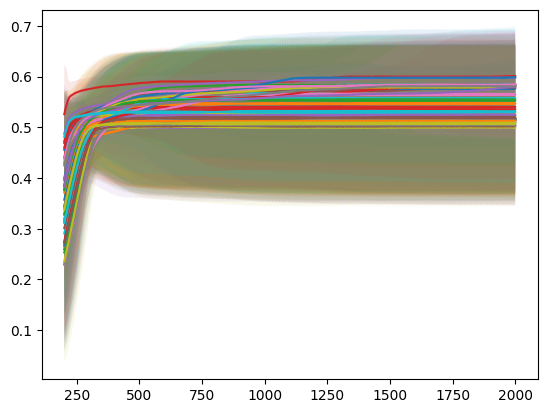

In [84]:
plt.plot(t[sum_time:], r_mean)
for i in range(N_set):
    plt.fill_between(t[sum_time:], (r_mean-r_std)[:, i],
                     (r_mean+r_std)[:, i], alpha=0.1)
# plt.xlim(0,500)

In [85]:
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
CSO_set = []
check_set = []
cluster_set = []
Is_group_set = []
c_threshold = np.where(r_mean < 0.1, 1e-4, 3e-4)
error_set = []
# Ks =K_set.reshape(-1)
for i in range(N_set):
    AVG = avg_dtheta_set[-1500:, i]
    c_check = c_threshold[i]
    CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
        AVG, height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega_sets[i])

    CSO = np.array([(S, O) for S, O in zip(CS, CMP)], dtype=dtype)
    CSO_set.append(CSO)

print(error_set)

[]


In [86]:
C_0 = []
C_1 = []
C_2 = []

for i in range(N_set):
    A = CSO_set[i]['cluster size']
    if len(A) >= 3:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(A[2])

    if len(A) == 2:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(0)
    elif len(A) == 1:
        C_0.append(A[0])
        C_1.append(0)
        C_2.append(0)
    elif len(A) == 0:
        C_0.append(0)
        C_1.append(0)
        C_2.append(0)

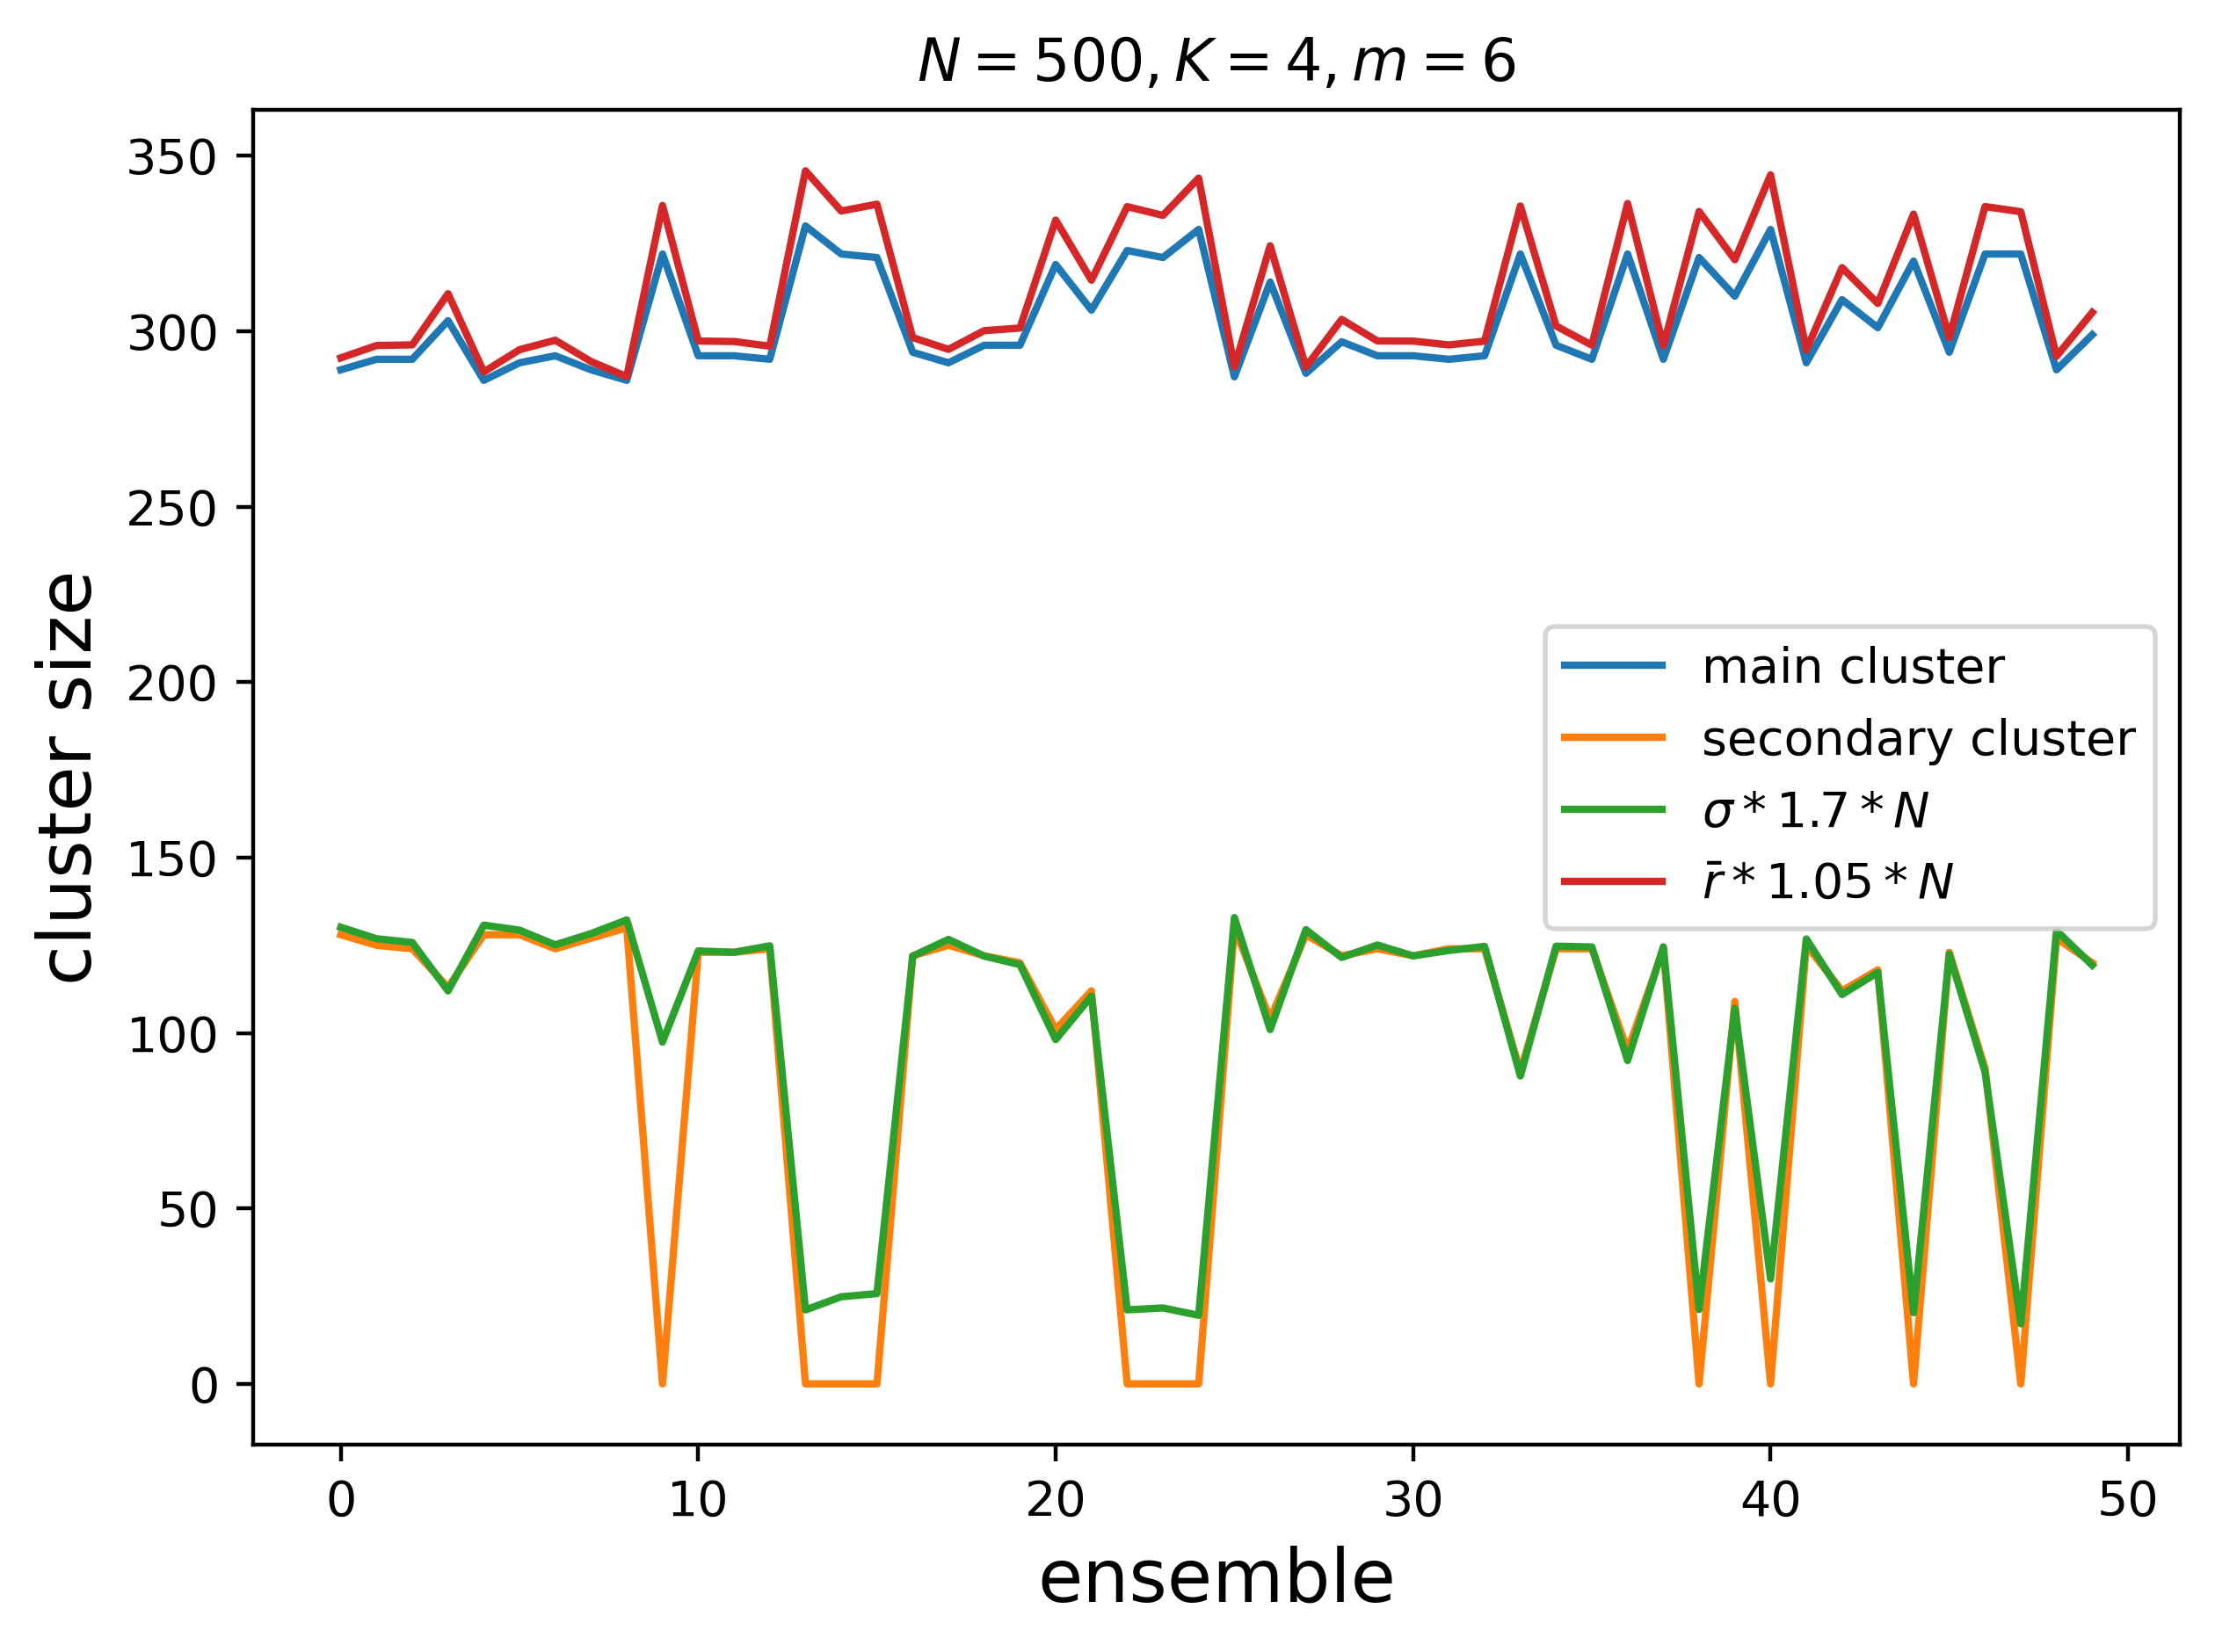

In [87]:
plt.figure(dpi=400)
plt.plot(np.array(C_0), label='main cluster')
plt.plot(np.array(C_1) + np.array(C_2), label='secondary cluster')
# plt.plot(np.array(C_2))
plt.plot(r_std[-1]*1.7*N, label=r'$\sigma*1.7*N$')
plt.plot(r_mean[-1]*1.15*N, label=r'$\bar{r}*1.05*N$')
plt.legend()
plt.ylabel('cluster size', fontsize=15)
plt.xlabel('ensemble', fontsize=15)
plt.title(rf'$N = {N}, K = {K}, m = {m}$')
plt.tight_layout()
plt.show()

In [2]:
m = 0
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 1.60
seed = 100
N = 500
theta_init, omega, Kc = Normal(N, 0, 1, seed=seed)
N_set = 50
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set, 1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set, 1))*np.zeros_like(omega))

for i in range(N_set):
    theta_init, omega, Kc = Normal(N, 0, 1, seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega
omega_sets = omega_sets_temp

# m = 10
t_end = 2000
dt = 0.1
t = np.arange(0, t_end, dt)
theta_set, dtheta_set, rs = mf2_sets_0(m=m, N=N, K_set=K, t_array=t, p_theta=theta_sets,
                                         p_dtheta=0*omega_sets, p_omega=omega_sets, result_time=int((t_end-350)*(1/dt)))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(array(float64, 2d, C), UniTuple(slice<a:b> x 2), array(complex128, 2d, C))
 
There are 16 candidate implementations:
[1m   - Of which 16 did not match due to:
   Overload of function 'setitem': File: <numerous>: Line N/A.
     With argument(s): '(array(float64, 2d, C), UniTuple(slice<a:b> x 2), array(complex128, 2d, C))':[0m
[1m    No match.[0m
[0m
[0m[1mDuring: typing of setitem at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Kuramoto_model.py (122)[0m
[1m
File "TO_sim\Kuramoto_model.py", line 122:[0m
[1mdef Kuramoto_1st_mf_sets_r(theta_sets,t,omega,N,m,K_set):
    <source elided>
    dtheta = omega + K_set*r*np.sin(psi - theta)
[1m    theta_sets[:,:N] = dtheta
[0m    [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function Kuramoto_1st_mf_sets_r at 0x00000134453CD8A0>))[0m
[0m[1mDuring: typing of call at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Integrator.py (144)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function Kuramoto_1st_mf_sets_r at 0x00000134453CD8A0>))[0m
[0m[1mDuring: typing of call at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Integrator.py (144)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function Kuramoto_1st_mf_sets_r at 0x00000134453CD8A0>))[0m
[0m[1mDuring: typing of call at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Integrator.py (144)
[0m
[1m
File "TO_sim\Integrator.py", line 144:[0m
[1mdef RK4_r_sets(f, y0, t, args=(),result_time = 0):
    <source elided>
    for i in range(result_time):
[1m        k1,r = f(y_, t, *args)
[0m        [1m^[0m[0m


In [3]:
np.c_[theta_sets,theta_sets].shape

(50, 1000)

In [ ]:
solve_ivp

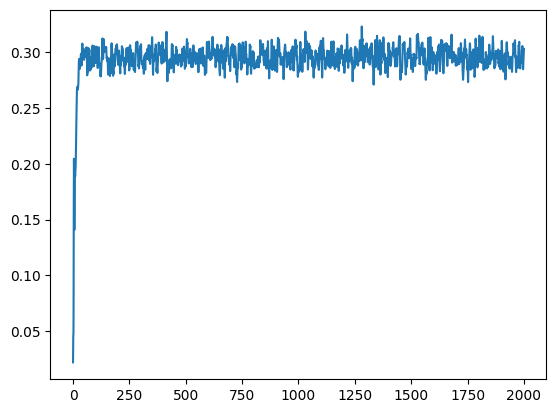

In [3]:
plt.plot(t,np.mean(rs.T[0].T,axis=1))

In [4]:

f = lambda t,theta_sets,omega,N,m,K_set: Kuramoto_1st_mf_sets_r(theta_sets, t, omega, N, m, K_set)
f = lambda theta_sets,t,omega,N,m,K_set: Kuramoto_1st_mf(theta_sets, t, omega, N, m, K_set)
f = lambda t,theta_sets,omega,N,m,K_set: Kuramoto_1st_mf(theta_sets, t, omega, N, m, K_set)

In [4]:
solve_ivp

<function scipy.integrate._ivp.ivp.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)>

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.9997e+03, 1.9998e+03,
       1.9999e+03])

In [44]:
t = np.arange(0,t_end+0.1/2,0.1)

In [52]:
np.c_[theta_sets,0*omega_sets].shap

(50, 1000)

In [54]:
s.shape

(1000,)

In [6]:
sets = np.c_[theta_sets,0*omega_sets] 
rs2 = []
for s,omega in zip(sets,omega_sets):
    sol = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),max_step=0.1)
    # sol = odeint(f,y0=s,t=t,args=(omega,N,m,K))
    r = np.abs(np.mean(np.exp(sol[:N]*1j),axis=0))

    rs2.append(r)
    # break
# solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=sets,args=(omega_sets,N,m,K))

TypeError: unhashable type: 'slice'

In [61]:
sol1 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),dense_output=True)
r1 = np.abs(np.mean(np.exp(sol1.y[:N]*1j),axis=0))
sol2 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),rtol=1e-6)
r2 = np.abs(np.mean(np.exp(sol.y[:N]*1j),axis=0))
sol3 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),dense_output=True)
r3 = np.abs(np.mean(np.exp(sol.sol(t)*1j),axis=0))


In [21]:
sol2 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),rtol=1e-6)
r2 = np.abs(np.mean(np.exp(sol2.y[:N]*1j),axis=0))

In [26]:
sol = odeint(f,y0=s,t=t,args=(omega,N,m,K))
r3 = np.abs(np.mean(np.exp(sol.T[:N]*1j),axis=0))


TypeError: 'float' object is not subscriptable

In [25]:
sol2.y.shape

(1000, 20000)

In [23]:
sol.shape

(20000, 1000)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf_sets_r,Kuramoto_2nd_mf,Kuramoto_1st_mf_sets_r,Kuramoto_1st_mf
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_0 as mf2_sets_0
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
from TO_sim.Integrator import RK4

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r
from scipy.integrate import solve_ivp,odeint
import seaborn as sns
max_c = 3e-4

import TO_sim.Integrator_jit as IJ
import TO_sim.Kuramoto_model as KU
RK4_jit = IJ.RK4


In [10]:
sol_RK4 = RK4(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

In [11]:
%timeit  RK4_jit(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

1.05 s ± 9.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit  RK4(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

1.72 s ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit  RK4(Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

1.79 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
np.concatenate([np.zeros(N),np.zeros(N)]).shape

(1000,)

In [66]:
r3 = np.abs(np.mean(np.exp(sol.sol(t[::10])*1j),axis=0))

In [27]:
r3 = np.abs(np.mean(np.exp(sol.T[:N]*1j),axis=0))


In [108]:

r_RK4_jit = np.abs(np.mean(np.exp(sol_RK4_jit.T[:N]*1j),axis=0))

In [99]:
# sol_RK4 = RK4(Kuramoto_1st_mf,s, t, args=(omega, N, m, K))
sol_RK4 = RK4(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))
r_RK4 = np.abs(np.mean(np.exp(sol_RK4.T[:N]*1j),axis=0))


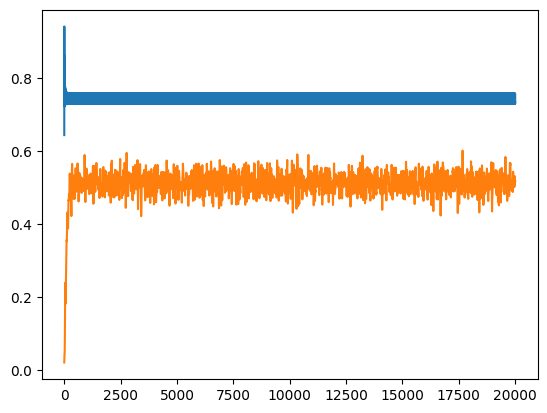

In [109]:
plt.plot(r_RK4)
plt.plot(r_RK4_jit)

In [88]:
sol_RK4.shape

(20000, 1000)

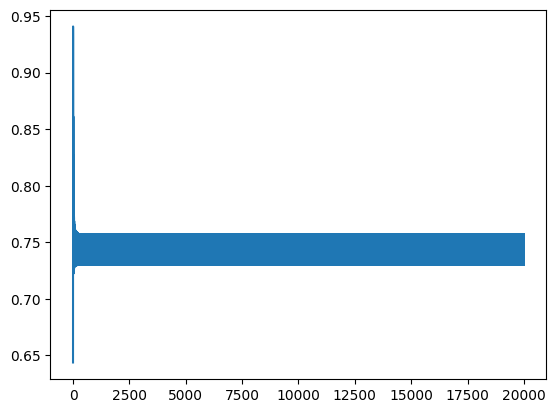

In [89]:
# r3 = np.abs(np.mean(np.exp(sol[:N]*1j),axis=0))

# plt.plot(r3)
plt.plot(r_RK4)
# plt.plot(r2)

In [65]:
sol.sol(t)

array([[ 2.72721293e-01, -2.70122182e-02, -3.27834470e-01, ...,
        -5.57417026e+03, -5.57443925e+03, -5.57473121e+03],
       [-1.39254622e+00, -1.68280246e+00, -1.97264743e+00, ...,
        -5.40443162e+03, -5.40467604e+03, -5.40495198e+03],
       [-4.74269965e-01, -7.12118938e-01, -9.50575863e-01, ...,
        -4.38846952e+03, -4.38877573e+03, -4.38903019e+03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

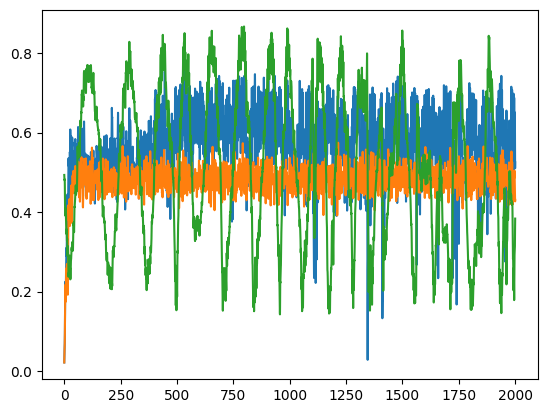

In [62]:
plt.plot(t,r1)
plt.plot(t,r2)
plt.plot(t,r3)

In [57]:
r = np.abs(np.mean(np.exp(sol.y[:N]*1j),axis=0))


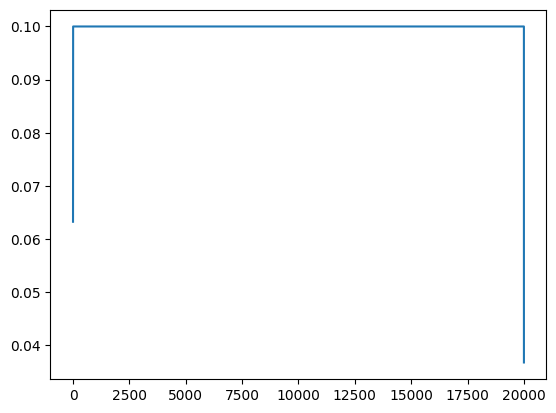

In [53]:
# plt.plot(sol.t)
plt.plot(np.diff(sol.t))
# dt = 0.1, 0.01

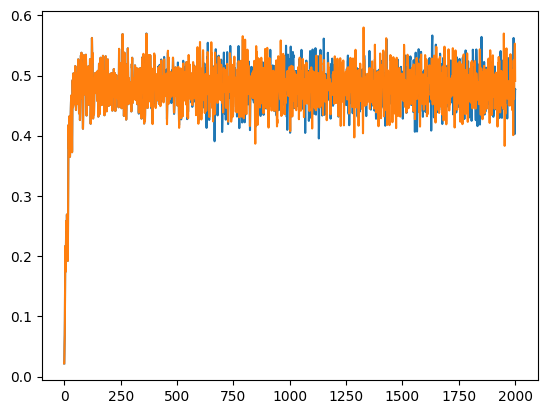

In [42]:
plt.plot(t,r)
plt.plot(t,rs.T[0][-1])

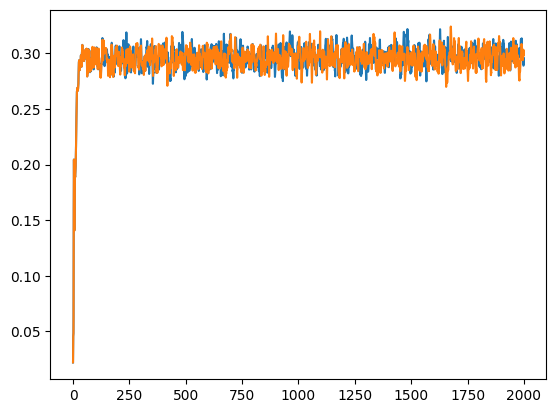

In [39]:
# plt.plot(t,np.array(rs2).T); 
plt.plot(t,np.mean(np.array(rs2).T,axis=1));
plt.plot(t,np.mean(rs.T[0].T,axis=1));

In [20]:
r.shape

(20000,)

In [10]:
eval=t,y0=s,args=(omega,N,m,K))
    break

# solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=sets,args=(omega_sets,N,m,K))

SyntaxError: unmatched ')' (1347783123.py, line 1)

In [ ]:
sol = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K))


## cluster check

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf_sets_r,Kuramoto_2nd_mf,Kuramoto_1st_mf_sets_r,Kuramoto_1st_mf
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_0 as mf2_sets_0
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
from TO_sim.Integrator import RK4

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r
from scipy.integrate import solve_ivp,odeint
import seaborn as sns
max_c = 3e-4

import TO_sim.Integrator_jit as IJ
import TO_sim.Kuramoto_model as KU

RK4_jit = IJ.RK4


In [38]:
from knockknock import desktop_sender


@desktop_sender(title="Knockknock Desktop Notifier")
def end():pass

In [51]:
m = 10
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 5
seed = 10
N = 500
theta_init, omega, Kc =Lorentzian(N, 0, 1, seed=11)
N_set = 50
theta_sets = (np.ones((N_set, 1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set, 1))*np.zeros_like(omega))
omega_ = np.sort(omega) - np.mean(omega)

for i in range(N_set):
    theta_init, omega, Kc = Lorentzian(N, 0, 1, seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega_
    theta_sets[i] = theta_init
omega_sets = omega_sets_temp

# m = 10
t_end = 2000
dt = 0.1
t = np.arange(0, t_end, dt)
sets = np.c_[theta_sets,0*omega_sets] 
rs2 = []
theta_set = np.zeros((len(t),N_set,N))
dtheta_set = np.zeros((len(t),N_set,N))
r_sets = np.zeros((N_set,len(t)))
for i,(s,omega) in enumerate(zip(sets,omega_sets)):
    sol = RK4_jit(Kuramoto_2nd_mf,s, t, args=(omega, N, m, K))
    theta,dtheta = sol[:,:N],sol[:,N:2*N]
    theta_set[:,i] = theta
    dtheta_set[:,i] = dtheta
    r = np.abs(np.mean(np.exp(theta.T*1j),axis=0))
    r_sets[i] = r
end()

In [52]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta_set[-4000:], axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
del dtheta_c, theta_set, dtheta_set

In [53]:
r_mean_last = np.mean(r_sets.T[-sum_time:],axis=0)
r_std_last = np.std(r_sets.T[-sum_time:],axis=0)

(-3.0, 3.0)

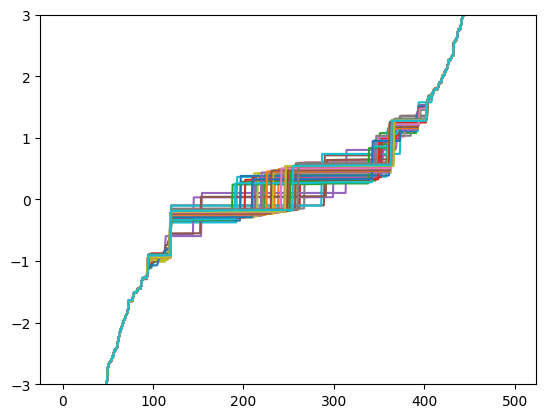

In [54]:
plt.plot(np.sort(avg_dtheta_set[-1].T,axis=0));
plt.ylim(-3,3)

In [55]:
r_mean_last

array([0.21209194, 0.22333796, 0.19993644, 0.2435837 , 0.2779491 ,
       0.30684851, 0.23249279, 0.25487971, 0.24692603, 0.27246173,
       0.2264596 , 0.21733088, 0.21108336, 0.25438669, 0.26636085,
       0.22893228, 0.21908809, 0.25241342, 0.23708914, 0.30616046,
       0.21609913, 0.21522001, 0.22133476, 0.21685815, 0.20100041,
       0.22012473, 0.20235069, 0.19468572, 0.2386095 , 0.23389541,
       0.26831223, 0.23192244, 0.21842653, 0.22165674, 0.22674257,
       0.23831834, 0.22803223, 0.22155586, 0.21749873, 0.21581334,
       0.19803918, 0.22188285, 0.23021592, 0.22675281, 0.22818062,
       0.21898543, 0.22173262, 0.24694814, 0.22881279, 0.23378999])

In [59]:
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
CSO_set = []
check_set = []
cluster_set = []
Is_group_set = []
c_threshold = np.where(r_mean_last < 0.1, 1e-4, 3e-4)
error_set = []
# Ks =K_set.reshape(-1)
for i in range(N_set):
    AVG = avg_dtheta_set[-1500:, i]
    c_check = c_threshold[i]
    CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
        AVG, height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega_sets[i])

    CSO = np.array([(S, O) for S, O in zip(CS, CMP)], dtype=dtype)
    CSO_set.append(CSO)

print(error_set)

[]


In [60]:
C_0 = []
C_1 = []
C_2 = []

for i in range(N_set):
    A = CSO_set[i]['cluster size']
    if len(A) >= 3:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(A[2])

    if len(A) == 2:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(0)
    elif len(A) == 1:
        C_0.append(A[0])
        C_1.append(0)
        C_2.append(0)
    elif len(A) == 0:
        C_0.append(0)
        C_1.append(0)
        C_2.append(0)

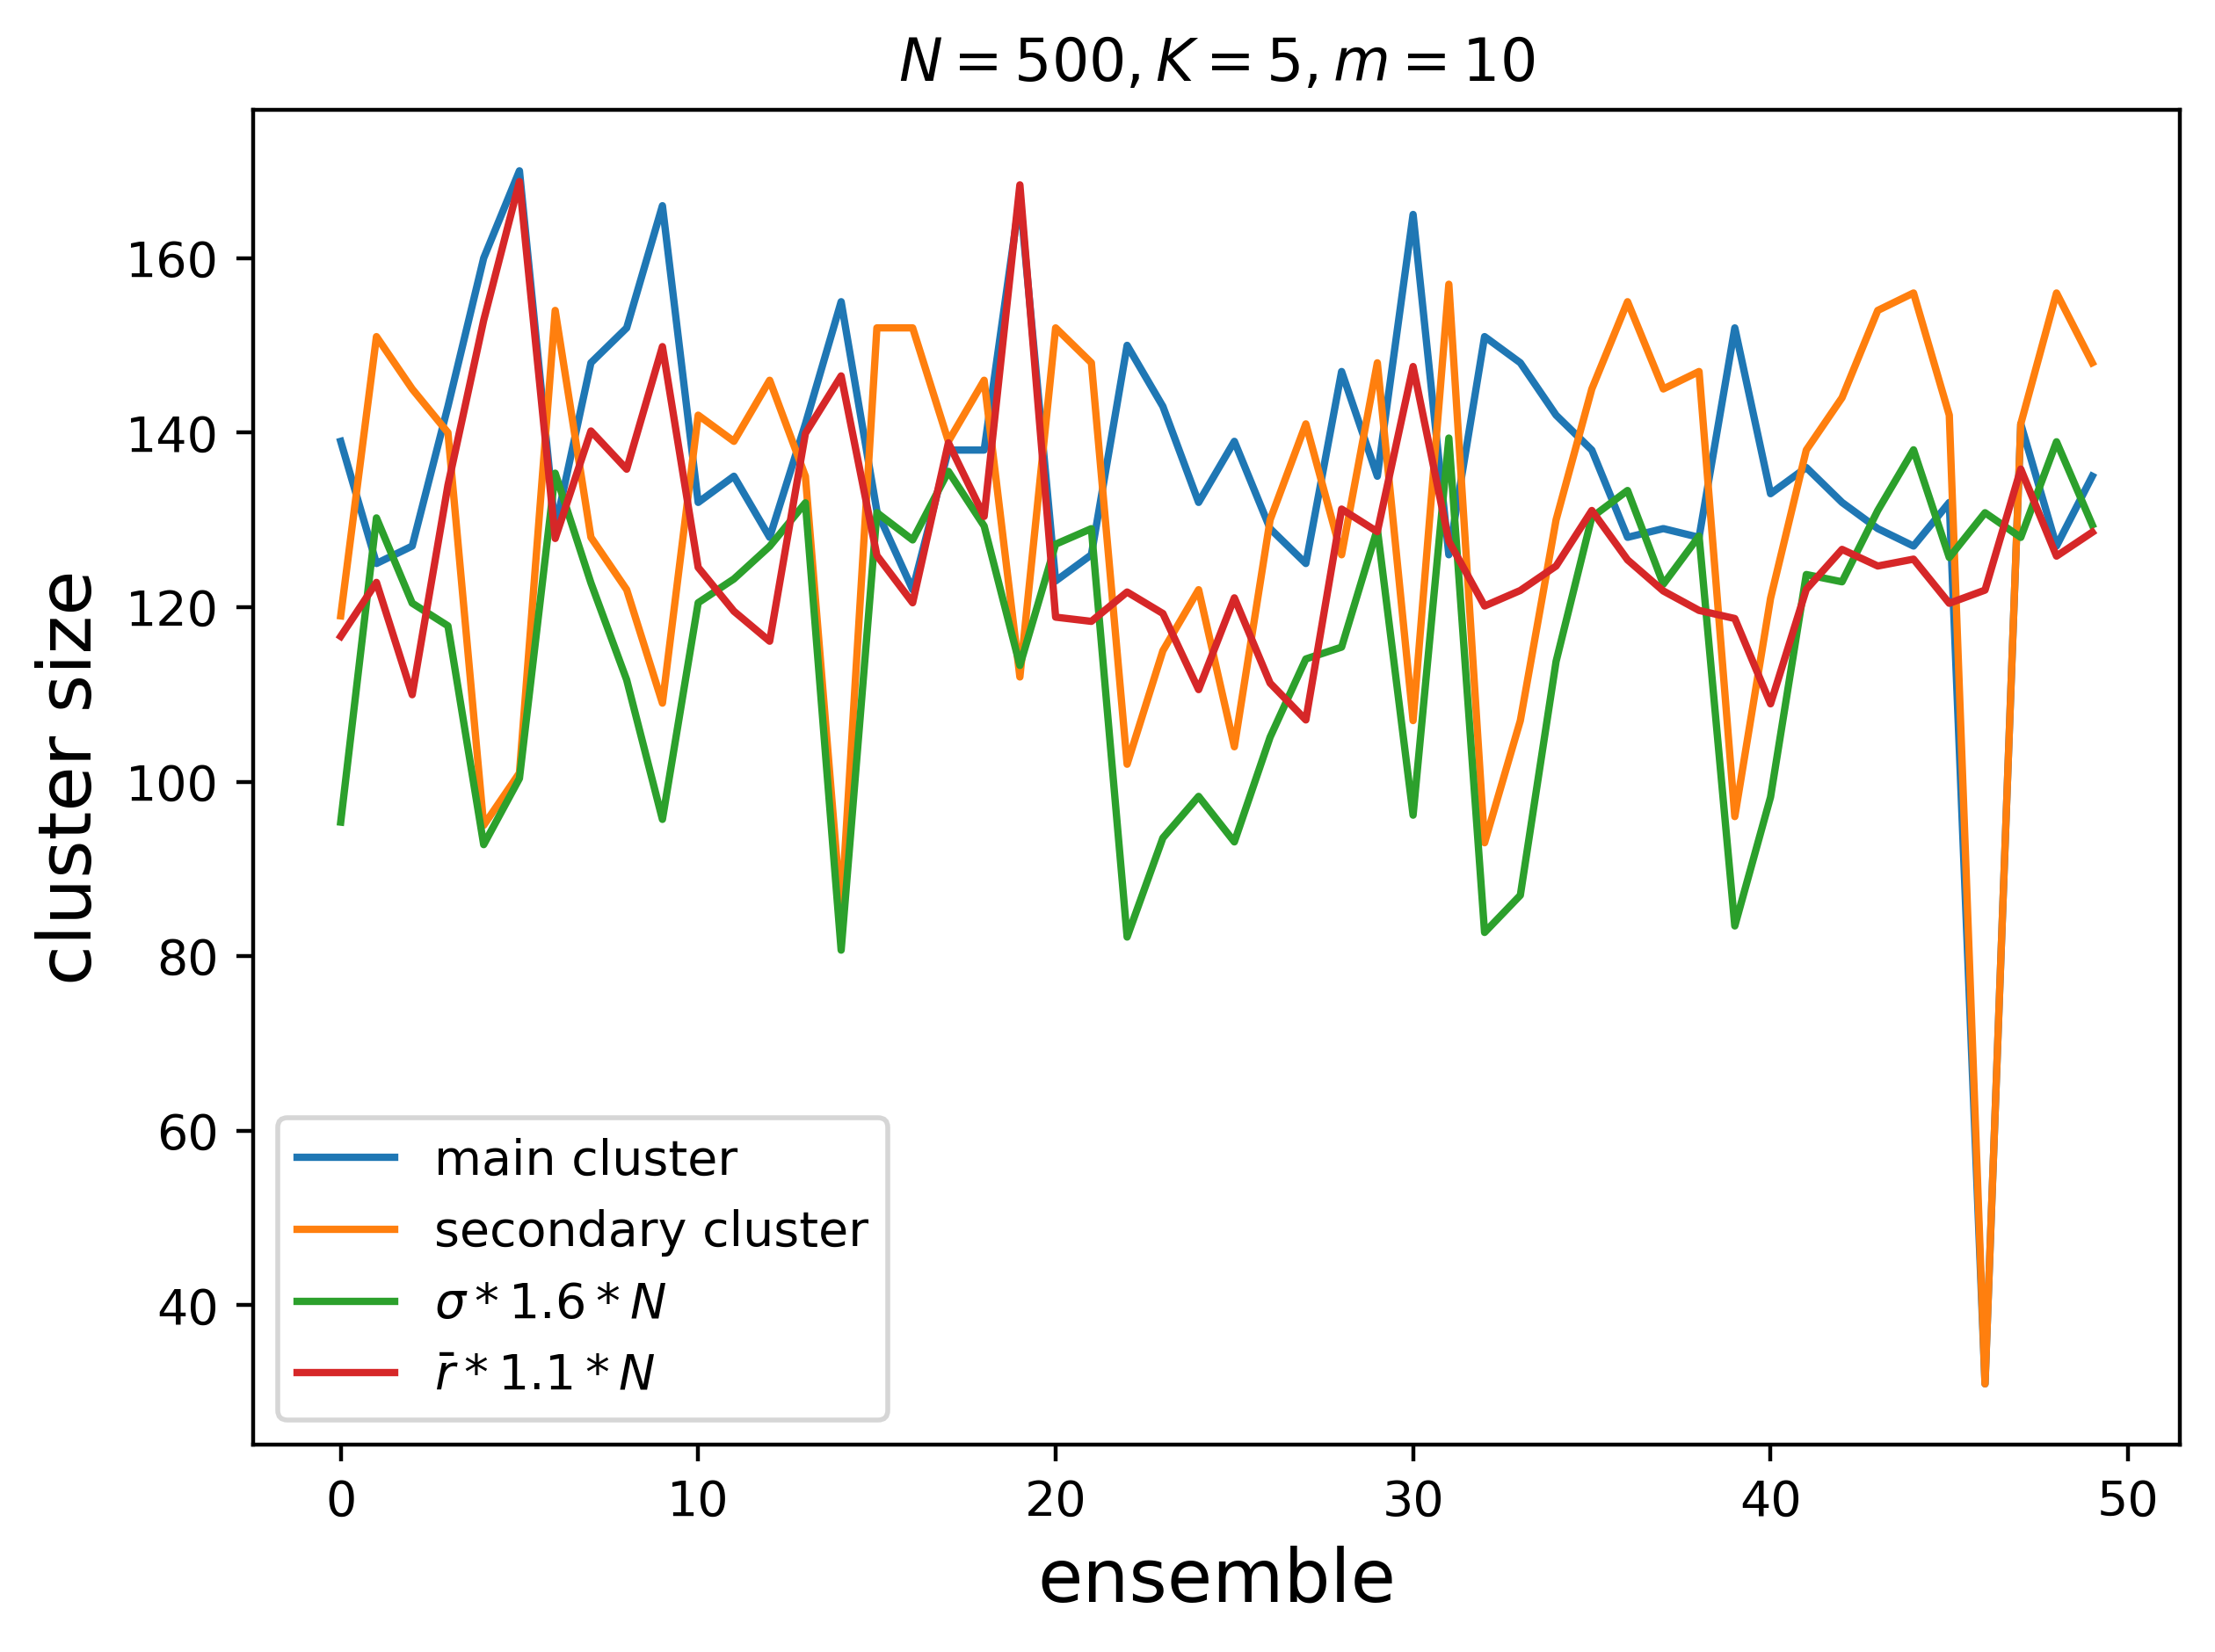

In [62]:
plt.figure(dpi=400)
plt.plot(np.array(C_0), label='main cluster')

plt.plot((np.array(C_1) + np.array(C_2)), label='secondary cluster')
# plt.plot(np.array(C_2))
plt.plot(r_std_last*1.6*N, label=r'$\sigma*1.6*N$')
plt.plot(r_mean_last*1.1*N, label=r'$\bar{r}*1.1*N$')
plt.legend()
plt.ylabel('cluster size', fontsize=15)
plt.xlabel('ensemble', fontsize=15)
plt.title(rf'$N = {N}, K = {K}, m = {m}$')
plt.tight_layout()
plt.show()
# end()

In [41]:
r_sets = np.zeros((N_set,len(t)))

In [45]:
theta.shape

(20000, 500)

In [35]:
theta,dtheta = sol[:,:N],sol[:,N:2*N]
r = np.abs(np.mean(np.exp(theta*1j),axis=0))

In [37]:
theta_sets = np.zeros((N_set,len(t),N))
dtheta_sets = np.zeros((N_set,len(t),N))

In [38]:
theta_sets[0]=theta

In [63]:
%timeit RK4_jit(Kuramoto_2nd_mf,s, t, args=(omega, N, m, K))

693 ms ± 2.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
%timeit RK4(Kuramoto_2nd_mf,s, t, args=(omega, N, m, K))

918 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Cluster order parameter

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
RK4_jit = IJ.RK4

In [4]:
seed = 10
N = 1000
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
K = 6
dt = 0.1
t = np.arange(0, 10000+dt/2, dt)
Theta = np.zeros(2*N)
Theta[:N] = theta_random 
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t, args=(omega, N, m, K))
theta,dtheta = sol[:,:N],sol[:,N:2*N]
rs = np.abs(np.mean(np.exp(theta.T*1j),axis=0))
# theta, dtheta, rs = mf2(K, N=N, m=m, t_array=t,
#                         p_theta=theta_random, p_dtheta=omega, p_omega=omega)
# sum_time = 2000
if dt <0.1:
    t = t[::10]
    theta = theta[::10]
    dtheta = dtheta[::10]
    rs = rs[::10]

In [12]:
np.mean(rs[-500:])

0.6367204955004633

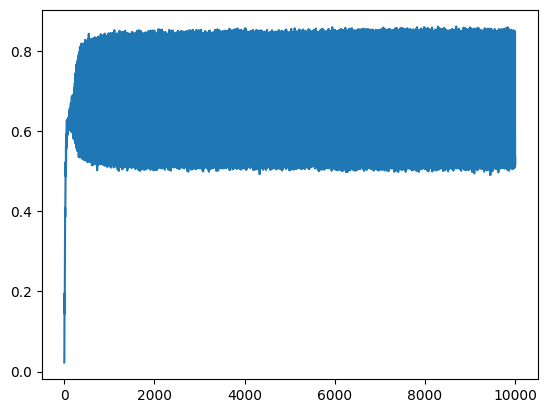

In [5]:
plt.plot(t,rs)

In [7]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta[:], axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta, axis=1)

CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
    avg_dtheta[-1500:], height=6e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS/N

array([0.699, 0.098, 0.093])

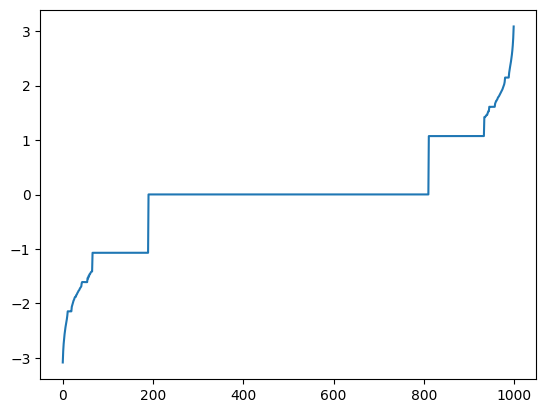

In [26]:
plt.plot(avg_dtheta[-1])

In [8]:
t_arg, = np.where(rs_clu[0]*N/CS[0]>0.50)
t_re = t_arg[0]
t[t_re:].shape

NameError: name 'rs_clu' is not defined

In [9]:
CLU = np.concatenate([*cluster])
not_CLU = np.setdiff1d(np.arange(N), CLU)
not_main = np.setdiff1d(np.arange(N), cluster[0])

In [10]:
rs_clu = []
rs_clu_mean = []
rs_clu_std = []
psi_clu = []
sum_time = 1000
for clu in cluster:
    temp = 1/N*np.sum(np.exp(1j*theta[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu.append(rc)
    rs_clu_mean.append(rc_mean)
    rs_clu_std.append(rc_std)
    psi_clu.append(psic)


temp_clu = 1/N*np.sum(np.exp(1j*theta[:, CLU]), axis=1)
temp_nclu = 1/N*np.sum(np.exp(1j*theta[:, not_CLU]), axis=1)

r_clu = abs(temp_clu)
r_nclu = abs(temp_nclu)
rs_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])
rs_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                    for i in range(len(t)-sum_time)])


In [11]:
rs_clu_mean[0][-1]

0.6918833801377066

In [201]:
rs_std[-1]/(2**0.5)

0.006976357130562128

In [198]:
rs_clu_mean[-1]

array([0.72754682, 0.72843207, 0.72931706, ..., 0.91165646, 0.91165656,
       0.91165662])

In [29]:
r_= rs_clu[0] + rs_clu[1] *np.cos(psi_clu[1]-psi_clu[0])  + rs_clu[2] *np.cos(psi_clu[2]-psi_clu[0])
r_mean = np.array([np.mean(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])
r_std = np.array([np.std(r_[i:i+sum_time], axis=0) for i in range(len(t)-sum_time)])

In [30]:
def A(r,K=K,m=m):
    return 1/np.sqrt(K*r*m)

def B(r,CS,CM,K=K,m=m):
    return (CS-CM)/(K*r)
def M_theta(r,CS,CM,K=K,m=m):
    a = A(r,K=K,m=m)
    b = B(r,CS,CM,K=K,m=m)
    return - a**2/(2*b**2)
cm = np.mean(np.cos(psi_clu[1]-psi_clu[0])[-5000:])
M = M_theta(rs_clu_mean[0][-1],CMO[1],CMO[0])
print(cm,M)


-0.18167957256942724 -0.19150430459730214


In [32]:
names = []
for i in CMO:
    ro = i-CMO[0]
    if ro==0:names.append('Main cluster')
    elif ro<0:names.append(r'secondary cluster$(-)$')
    else:names.append(r'secondary cluster$(+)$')

In [33]:
t_arg, = np.where(rs_clu[0]*N/CS[0]>0.98)
t_re = t_arg[0]
t[t_re]

238.5

Text(0, 0.5, '$\\left\\langle r_{cluster}\\right\\rangle_{t;T_W}$')

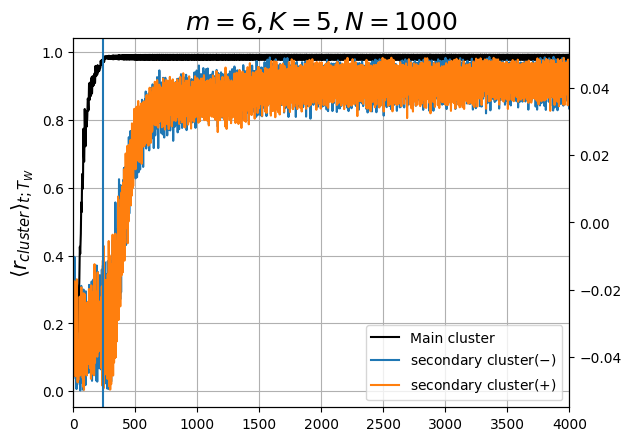

In [34]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
ax1_ = plt.twinx()
plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t, rc*N/CS[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t,rc*N/CS[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 4000)
plt.sca(ax1)
plt.axvline(t[t_arg][0])
plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)

In [476]:
t_arg, = np.where(rs_clu[0]*N/CS[0]>0.98)
t_re = t_arg[0]
t[t_re]

337.1

In [11]:
t[t_re:].shape

(148954,)

In [69]:
theta_before , dtheta_before = theta.copy(),dtheta.copy()

In [13]:
seed = 10
N = 500
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
Theta = np.zeros(2*CS[0])
Theta[:CS[0]] =  theta_before[t_re,cluster[0]]
Theta[CS[0]:] =  dtheta_before[t_re,cluster[0]]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[cluster[0]], CS[0], m, K))
theta_m,dtheta_m = sol[:,:CS[0]],sol[:,CS[0]:2*CS[0]]
rs_m = np.abs(np.mean(np.exp(theta_m.T*1j),axis=0))


In [14]:
seed = 10
N = 500
theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
Theta = np.zeros(2*len(not_main))
Theta[:len(not_main)] =  theta_before[t_re,not_main]
Theta[len(not_main):] =  dtheta_before[t_re,not_main]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[not_main], len(not_main), m, K))
theta_nm,dtheta_nm = sol[:,:len(not_main)],sol[:,len(not_main):2*CS[0]]
rs_nm = np.abs(np.mean(np.exp(theta_nm.T*1j),axis=0))

In [15]:
theta_after = theta_before.copy()
dtheta_after = dtheta_before.copy()

In [16]:
theta_after = np.zeros_like(theta_before)
dtheta_after = np.zeros_like(dtheta_before)

In [17]:
theta_after[:t_re] = theta_before[:t_re]
dtheta_after[:t_re] = dtheta_before[:t_re]

In [18]:
Atheta=theta_after[t_re:]
Adtheta=dtheta_after[t_re:]

In [19]:
Atheta[:,cluster[0]] = theta_m
Adtheta[:,cluster[0]] = dtheta_m
Atheta[:,not_main] = theta_nm
Adtheta[:,not_main] = dtheta_nm

In [20]:
theta_after[t_re:] = Atheta
dtheta_after[t_re:] = Adtheta

In [21]:
rs_after = np.abs(np.mean(np.exp(theta_after.T*1j),axis=0))

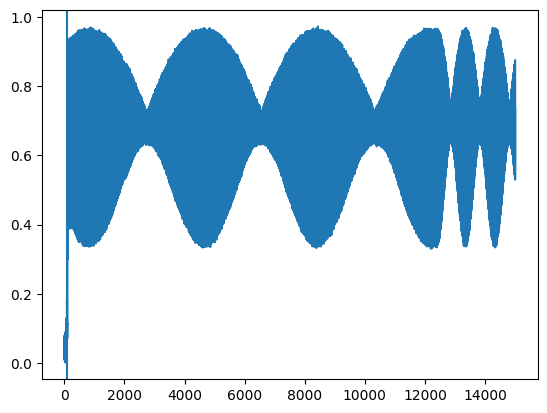

In [22]:
plt.plot(t,rs_after)
plt.axvline(t[t_re])

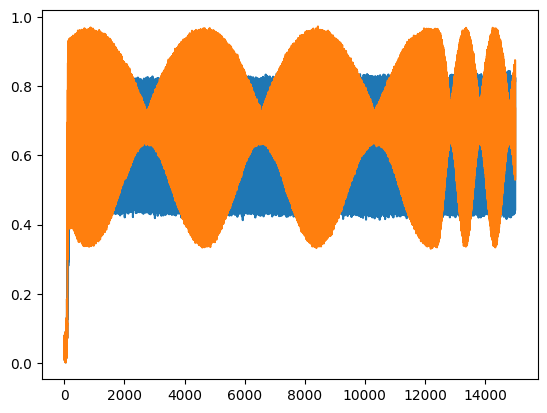

In [23]:
plt.plot(t,rs)
plt.plot(t,rs_after)

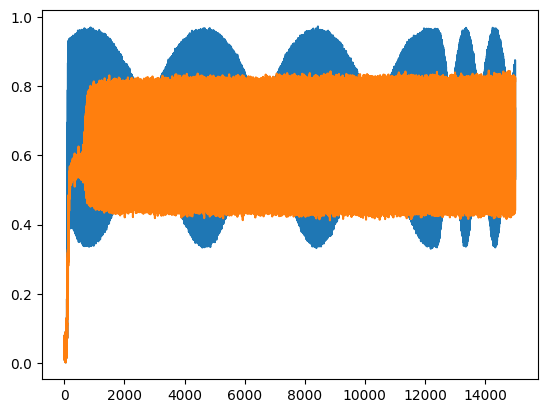

In [24]:
plt.plot(t,rs_after)
plt.plot(t,rs)

In [25]:
theta_after[:,cluster[0]].shape

(150001, 327)

In [26]:
theta_m.shape

(148954, 327)

In [27]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta_after[-4000:], axis=0)
avg_dtheta_a = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

CS_A, CMP_A, cluster_A, omega_s_A, omega_e_A, CMO_A, Is_group_A, C_s_A, C_e_A = cluster_os_new2(
    avg_dtheta_a[-1500:], height=1e-2, c_std=3, check=1e-4, c_size=5, N=500, omega=omega)
CS_A

array([327,  82,  78])

In [28]:
rs_clu_a = []
rs_clu_mean_a = []
rs_clu_std_a = []
psi_clu = []
sum_time = 1000
for clu in cluster_A:
    temp = 1/N*np.sum(np.exp(1j*theta_after[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu_a.append(rc)
    rs_clu_mean_a.append(rc_mean)
    rs_clu_std_a.append(rc_std)
    psi_clu.append(psic)


Text(0, 0.5, '$\\left\\langle r_{cluster}\\right\\rangle_{t;T_W}$')

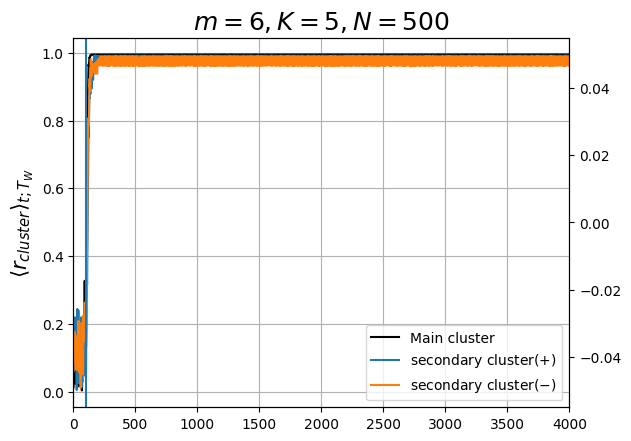

In [29]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
ax1_ = plt.twinx()
plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu_a,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t, rc*N/CS_A[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t,rc*N/CS_A[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 4000)
plt.sca(ax1)
plt.axvline(t[t_arg][0])
plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)

In [46]:
sum_time = 500
dtheta_c = np.cumsum(dtheta_before, axis=0)
avg_dtheta_before = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [31]:
sum_time = 100
dtheta_c = np.cumsum(dtheta_after, axis=0)
avg_dtheta_after = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

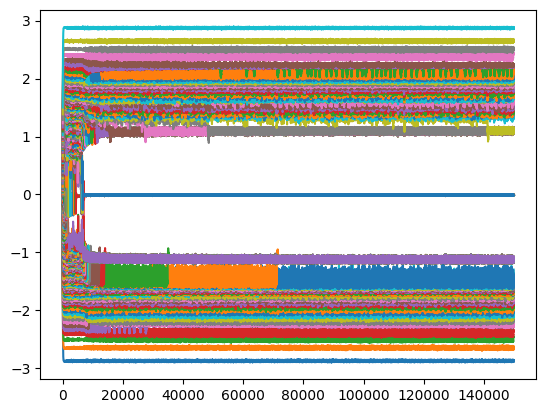

In [32]:
plt.plot(avg_dtheta_before);

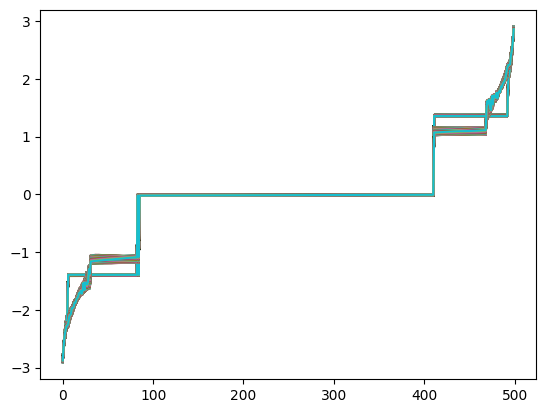

In [33]:
plt.plot(avg_dtheta_after[-1000:].T);
plt.plot(avg_dtheta_before[-1000:].T);

In [34]:
sum_time = 2000
dtheta_c = np.cumsum(dtheta_after[-4000:], axis=0)
avg_dtheta_a = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

CS_A, CMP_A, cluster_A, omega_s_A, omega_e_A, CMO_A, Is_group_A, C_s_A, C_e_A = cluster_os_new2(
    avg_dtheta_a[-1500:], height=1e-2, c_std=3, check=1e-4, c_size=5, N=500, omega=omega)
CS_A

array([327,  82,  78])

(0.0, 100.0)

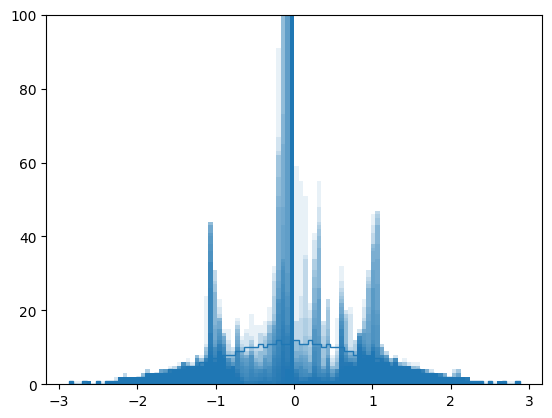

In [53]:
temp = avg_dtheta_before[:8000:50]
c,bins,_=plt.hist(omega,fill=False,bins=100,histtype='step')
for p in temp:
    plt.hist(p,bins=bins,alpha=0.1,color='tab:blue')
plt.ylim(0,100)

(0.0, 100.0)

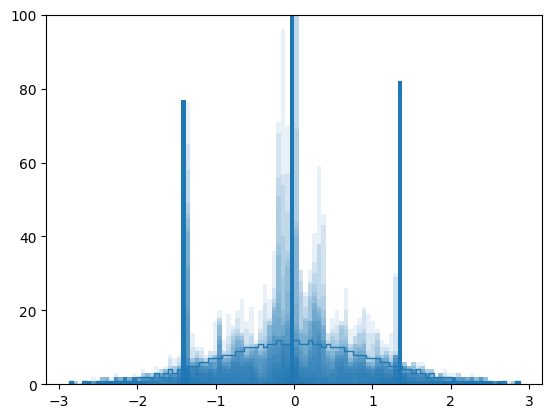

In [54]:
temp = avg_dtheta_after[:8000:50]
c,bins,_=plt.hist(omega,fill=False,bins=100,histtype='step')
cs = []
for p in temp:
    plt.hist(p,bins=bins,alpha=0.2,color='tab:blue')
plt.ylim(0,100)

In [ ]:
temp = avg_dtheta_after[:8000:50]
c,bins,_=np.hist(omega,fill=False,bins=100,histtype='step')
cs = []
for p in temp:
    plt.hist(p,bins=bins,alpha=0.2,color='tab:blue')
plt.ylim(0,100)

In [83]:
c,bins = np.histogram(omega,bins=100)
cs = [c]
for p in avg_dtheta_after:
    c,b = np.histogram(p,bins=bins)
    cs.append(c)

In [84]:
b.shape

(101,)

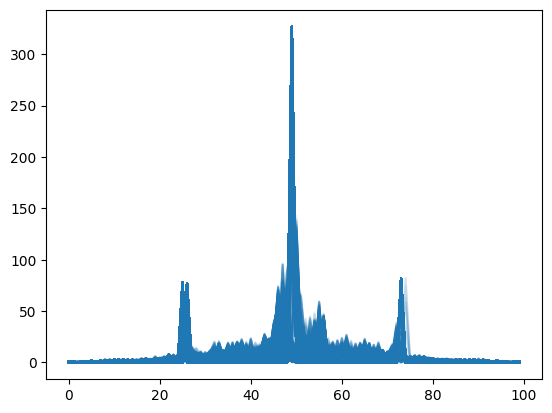

In [88]:
plt.plot(np.array(cs).T,alpha=0.1,color='tab:blue');

In [132]:
t_arg, = np.where(rs_clu[0]*N/CS[0]>0.98)
t_re = t_arg[0]
t[t_re:].shape
t[t_re]

238.5

In [ ]:
0.5402770996093751

In [64]:
rs_mean[-1]

0.5564455328862786

## 잘보이게 만든것

In [ ]:
t_arg, = np.where(rs_clu[0]*N/CS[0]>0.98)
t_re = t_arg[0]
t[t_re:].shape
t[t_re]

In [1]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
# ax1_ = plt.twinx()
# plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t, rc*N/CS[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t,rc*N/CS[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 1000)
plt.sca(ax1)
plt.axvline(t[t_arg][0])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)

NameError: name 'plt' is not defined

In [86]:
sum_time = 500
avg_dtheta_test = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

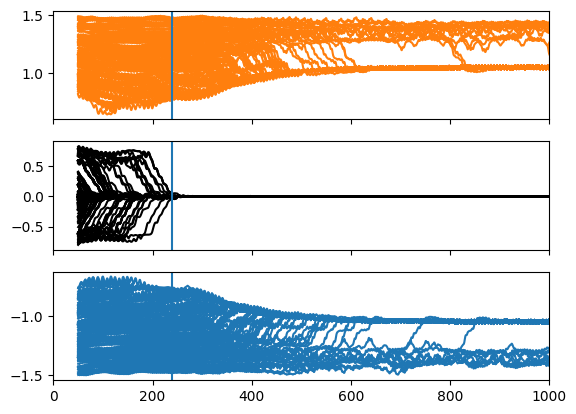

In [178]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
plt.sca(ax2)
plt.plot(t[sum_time:10000+sum_time],avg_dtheta_test[sum_time:10000+sum_time,cluster[0]],color='black')
plt.xlim(0, 1000)
plt.axvline(t[t_arg][0])

plt.sca(ax3)
plt.plot(t[sum_time:10000+sum_time],avg_dtheta_test[sum_time:10000+sum_time,cluster[1]],color='tab:blue')
plt.axvline(t[t_arg][0])

plt.sca(ax1)
plt.plot(t[sum_time:10000+sum_time],avg_dtheta_test[sum_time:10000+sum_time,cluster[2]],color='tab:orange')
# plt.sca(ax1)
plt.axvline(t[t_arg][0])


In [88]:
mo = np.mean(omega[cluster[0]])
mo

0.001414808331340741

In [64]:
theta_before , dtheta_before = theta.copy(),dtheta.copy()

In [66]:
mo = np.mean(omega[cluster[0]])
mo
omega_new = omega.copy()
omega_new[cluster[0]] = mo+0* omega[cluster[0]]

#### Identical oscillator로 치환

In [67]:
# seed = 10
# theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
Theta = np.zeros(2*N)
Theta[:N] =  theta_before[t_re]
Theta[N:] =  dtheta_before[t_re]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega_new, N, m, K))
theta_I,dtheta_I = sol[:,:N],sol[:,N:2*N]
rs_I = np.abs(np.mean(np.exp(theta_I.T*1j),axis=0))


In [68]:
theta_before[t_arg[0]:]= theta_I
dtheta_before[t_arg[0]:]= dtheta_I

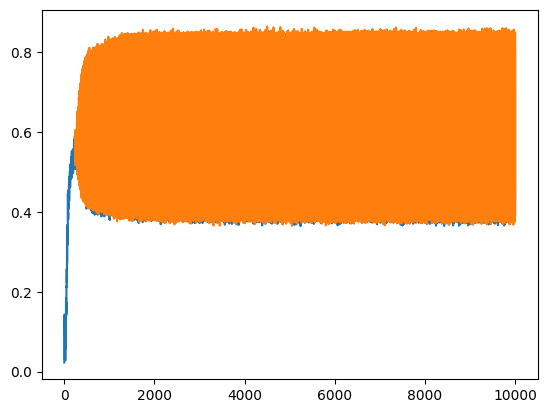

In [69]:
plt.plot(t,rs)
plt.plot(t[t_re:],rs_I)


In [128]:
sum_time = 2000
dtheta_cI = np.cumsum(dtheta_before, axis=0)
avg_dtheta_I = (dtheta_cI[sum_time:]-dtheta_cI[:-sum_time])/sum_time
CS_I, CMP_I, cluster_I, omega_s_I, omega_e_I, CMO_I, Is_group_I, C_s_I, C_e_I = cluster_os_new2(
    avg_dtheta_I[-1000:], height=6e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS_I

array([621, 126, 125])

In [130]:
CS_I,CS

(array([621, 126, 125]), array([621, 124, 123]))

In [129]:
rs_clu_I = []
rs_clu_I_mean = []
rs_clu_I_std = []
psi_clu = []
sum_time = 1000
for clu in cluster_I:
    temp = 1/N*np.sum(np.exp(1j*theta_before[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu_I.append(rc)
    rs_clu_I_mean.append(rc_mean)
    rs_clu_I_std.append(rc_std)
    psi_clu.append(psic)


rs_I_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])
rs_I_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                    for i in range(len(t)-sum_time)])


Text(0, 0.5, '$r_{cluster}$')

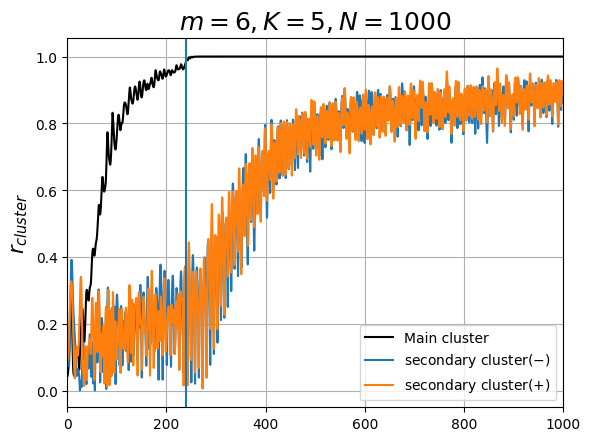

In [133]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
# ax1_ = plt.twinx()
# plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu_I,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t[:], rc*N/CS[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t[:],rc*N/CS[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 1000)
plt.sca(ax1)
plt.axvline(t[t_arg][0])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)

array([621, 127, 126])

In [134]:
sum_time = 500
avg_dtheta_test_I = (dtheta_cI[sum_time:]-dtheta_cI[:-sum_time])/sum_time

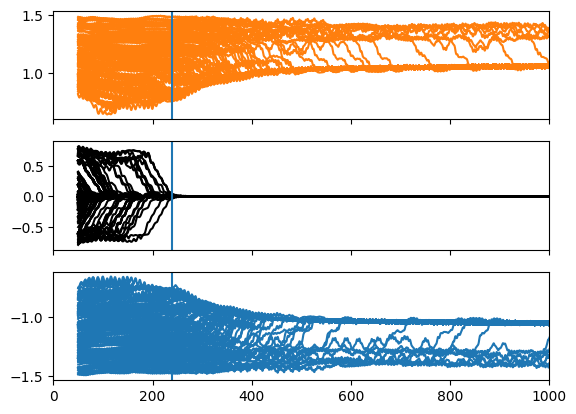

In [135]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
plt.sca(ax2)
plt.plot(t[sum_time:10000+sum_time],avg_dtheta_test_I[sum_time:10000+sum_time,cluster[0]],color='black')
plt.xlim(0, 1000)
plt.axvline(t[t_arg][0])

plt.sca(ax3)
plt.plot(t[sum_time:10000+sum_time],avg_dtheta_test_I[sum_time:10000+sum_time,cluster[1]],color='tab:blue')
plt.axvline(t[t_arg][0])

plt.sca(ax1)
plt.plot(t[sum_time:10000+sum_time],avg_dtheta_test_I[sum_time:10000+sum_time,cluster[2]],color='tab:orange')
# plt.sca(ax1)
plt.axvline(t[t_arg][0])


In [272]:
Theta = np.zeros(2*N)
Theta[:N] = theta_random
# Theta =  theta_before[t_re]
# Theta[N//2:] =  dtheta_before[t_re]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t, args=(np.abs(omega), N, m, K))
theta_HI,dtheta_HI = sol[:,:N],sol[:,N:2*N]
rs_HI = np.abs(np.mean(np.exp(theta_HI.T*1j),axis=0))


In [290]:
Theta = np.zeros(2*N)
Theta[:N] = theta_random
Theta[cluster[0]] = 0
Theta[N:2*N] = omega_new
# Theta =  theta_before[t_re]
# Theta[N//2:] =  dtheta_before[t_re]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t, args=((omega_new), N, m, K))
theta_HI,dtheta_HI = sol[:,:N],sol[:,N:2*N]
rs_HI = np.abs(np.mean(np.exp(theta_HI.T*1j),axis=0))


In [ ]:
# seed = 10
# theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
Theta = np.zeros(2*N)
Theta[:N] =  theta_before[t_re]
Theta[N:] =  dtheta_before[t_re]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega_new, N, m, K))
theta_I,dtheta_I = sol[:,:N],sol[:,N:2*N]
rs_I = np.abs(np.mean(np.exp(theta_I.T*1j),axis=0))


In [133]:
sum_time = 2000
dtheta_cI = np.cumsum(dtheta_before, axis=0)
avg_dtheta_I = (dtheta_cI[sum_time:]-dtheta_cI[:-sum_time])/sum_time
CS_A, CMP_A, cluster_A, omega_s_A, omega_e_A, CMO_A, Is_group_A, C_s_A, C_e_A = cluster_os_new2(
    avg_dtheta_I[-1000:], height=6e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS_A

array([621, 127, 126])

In [ ]:
avg_dtheta_I = (dtheta_cI[sum_time:]-dtheta_cI[:-sum_time])/sum_time


array([621])

In [94]:
CS

array([621, 125, 124])

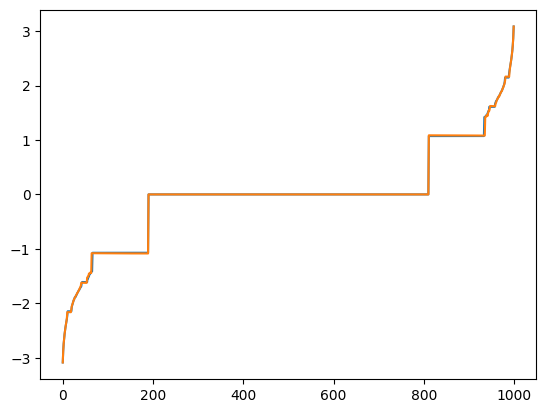

In [136]:
plt.plot(avg_dtheta[-1])
plt.plot(avg_dtheta_I[-1])

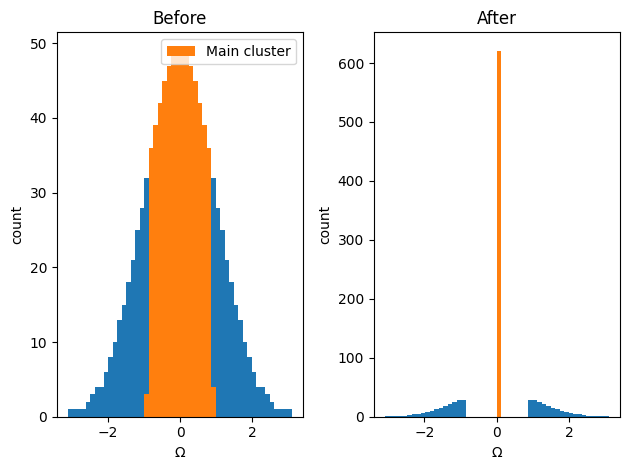

In [67]:
plt.subplot(121)
h,b,_ = plt.hist(omega,bins=50,)
plt.hist(omega[cluster[0]],bins=b,label='Main cluster')
plt.legend()
plt.title('Before')
plt.ylabel('count')
plt.xlabel('$\Omega$')
plt.subplot(122)
plt.hist(omega_new,bins=b,)
plt.hist(omega_new[cluster[0]],bins=b,)
plt.title('After')
plt.ylabel('count')
plt.xlabel('$\Omega$')
plt.tight_layout()

(0.0, 900.0)

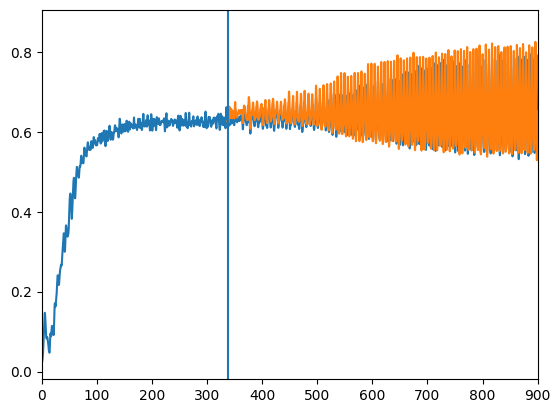

In [493]:
plt.plot(t,rs,label = 'Original')

plt.plot(t[t_re:],rs_I,label ='change cluster with Identical')
plt.axvline(t[t_arg][0])

plt.xlim(0,900)

### cluster 연결이 끊겼을때

In [138]:
theta_cut = theta.copy()
dtheta_cut = dtheta.copy()

In [139]:
theta_cut.shape

(100001, 1000)

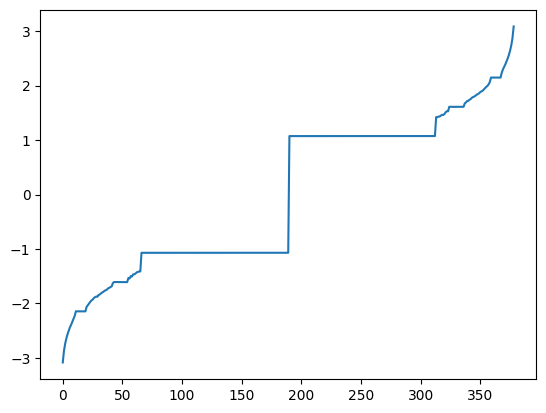

In [140]:
plt.plot(avg_dtheta[-1,not_main])

In [141]:
Theta = np.zeros(2*len(cluster[0]))
Theta[:len(cluster[0])] =  theta_cut[t_re,cluster[0]]
Theta[len(cluster[0]):] =  dtheta_cut[t_re,cluster[0]]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[cluster[0]], len(cluster[0]), m, K))
theta_anm,dtheta_anm = sol[:,:len(cluster[0])],sol[:,len(cluster[0]):2*CS[0]]

In [142]:
Theta = np.zeros(2*len(not_main))
Theta[:len(not_main)] =  theta_cut[t_re,not_main]
Theta[len(not_main):] =  dtheta_cut[t_re,not_main]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[not_main], len(not_main), m, K))
theta_nm,dtheta_nm = sol[:,:len(not_main)],sol[:,len(not_main):2*CS[0]]
rs_nm = np.abs(np.mean(np.exp(theta_nm.T*1j),axis=0))

In [143]:
omega_plus = np.where(omega_new[not_main]>0)
omega_minus = np.where(omega_new[not_main]<=0)

In [144]:
r_nmp = np.abs(np.mean(np.exp(theta_nm.T[omega_plus]*1j),axis=0))
r_nmm = np.abs(np.mean(np.exp(theta_nm.T[omega_minus]*1j),axis=0))

(0.0, 600.0)

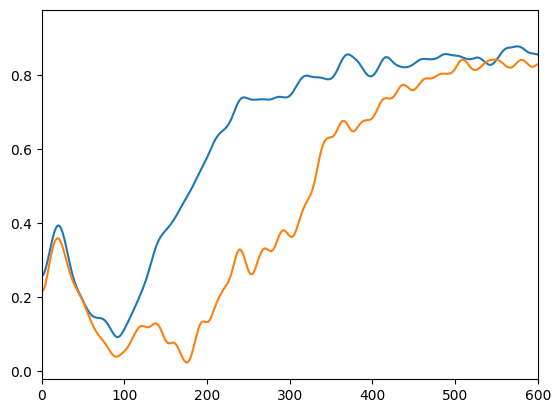

In [145]:
# plt.plot(rs_nm)
# plt.plot(rs_anm)
plt.plot(r_nmp)
plt.plot(r_nmm)
plt.xlim(0,600)

In [146]:
theta_after = np.zeros_like(theta_before)
dtheta_after = np.zeros_like(dtheta_before)

In [147]:
theta_after[:t_re] = theta_before[:t_re]
dtheta_after[:t_re] = dtheta_before[:t_re]

In [148]:
Atheta=theta_after[t_re:]
Adtheta=dtheta_after[t_re:]

In [149]:
Atheta[:,cluster[0]] = theta_anm
Adtheta[:,cluster[0]] = dtheta_anm
Atheta[:,not_main] = theta_nm
Adtheta[:,not_main] = dtheta_nm

In [150]:
theta_after[t_re:] = Atheta
dtheta_after[t_re:] = Adtheta

In [151]:
sum_time = 2000
dtheta_c_cut = np.cumsum(dtheta_after, axis=0)
avg_dtheta_CUT = (dtheta_c_cut[sum_time:]-dtheta_c_cut[:-sum_time])/sum_time
CS_CUT, CMP_CUT, cluster_CUT, omega_s_CUT, omega_e_CUT, CMO_CUT, Is_group_CUT, C_s_CUT, C_e_CUT = cluster_os_new2(
    avg_dtheta_CUT[-1000:], height=6e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS_CUT

array([621, 173, 172])

In [159]:
CS

array([621, 125, 124])

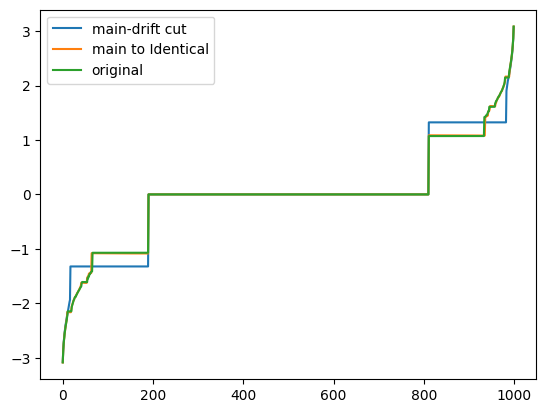

In [152]:
plt.plot(avg_dtheta_CUT[-1],label='main-drift cut')
plt.plot(avg_dtheta_I[-1],label='main to Identical')
plt.plot(avg_dtheta[-1],label='original')
plt.legend()

In [153]:
rs_clu_cut = []
rs_clu_cut_mean = []
rs_clu_cut_std = []
psi_clu = []
sum_time = 1000
for clu in cluster_CUT:
    temp = 1/N*np.sum(np.exp(1j*theta_after[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu_cut.append(rc)
    rs_clu_cut_mean.append(rc_mean)
    rs_clu_cut_std.append(rc_std)
    psi_clu.append(psic)


rs_cut_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])
rs_cut_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                    for i in range(len(t)-sum_time)])


In [294]:
2*(norm.cdf(0.3) - 0.5)

0.23582284437790513

Text(0, 0.5, '$r_{cluster}$')

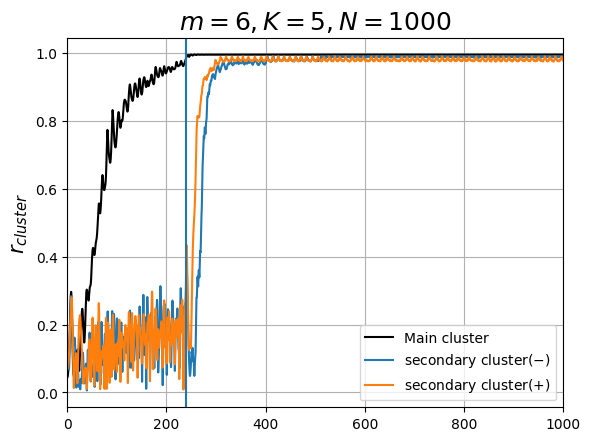

In [155]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
# ax1_ = plt.twinx()
# plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu_cut,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t[:], rc*N/CS_CUT[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t[:],rc*N/CS_CUT[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 1000)
plt.sca(ax1)
plt.axvline(t[t_arg][0])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)

In [156]:
sum_time = 500
avg_dtheta_test_CUT = (dtheta_c_cut[sum_time:]-dtheta_c_cut[:-sum_time])/sum_time

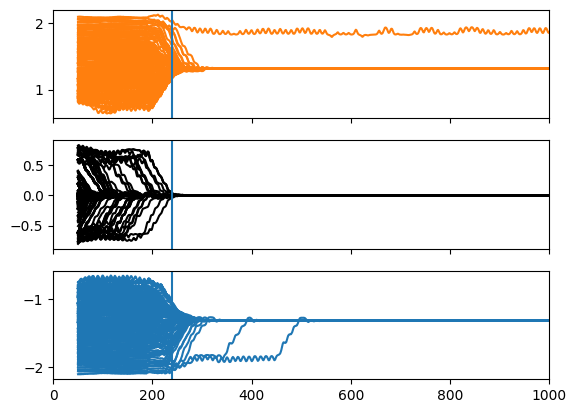

In [157]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
plt.sca(ax2)
plt.plot(t[sum_time:10000],avg_dtheta_test_CUT[sum_time:10000,cluster_CUT[0]],color='black')
plt.xlim(0, 1000)
plt.axvline(t[t_arg][0])

plt.sca(ax3)
plt.plot(t[sum_time:10000],avg_dtheta_test_CUT[sum_time:10000,cluster_CUT[1]],color='tab:blue')
plt.axvline(t[t_arg][0])

plt.sca(ax1)
plt.plot(t[sum_time:10000],avg_dtheta_test_CUT[sum_time:10000,cluster_CUT[2]],color='tab:orange')
# plt.sca(ax1)
plt.axvline(t[t_arg][0])


## cluster의 분포를 다시 만듦

In [158]:
theta_cut = theta.copy()
dtheta_cut = dtheta.copy()

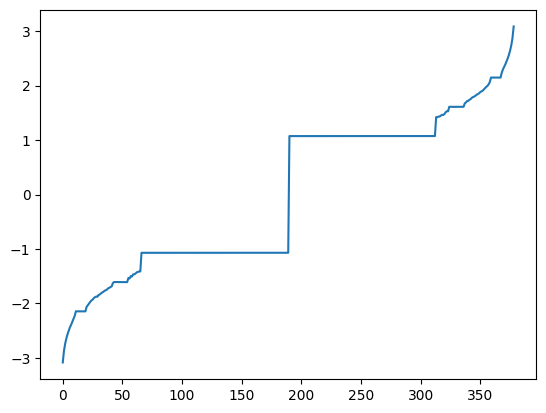

In [159]:
plt.plot(avg_dtheta[-1,not_main])

In [39]:
1-rs_clu_mean[0][-1]

0.3879098535264378

In [160]:
Theta = np.zeros(2*len(cluster[0]))
Theta[:len(cluster[0])] =  theta_cut[t_re,cluster[0]]
Theta[len(cluster[0]):] =  dtheta_cut[t_re,cluster[0]]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[cluster[0]], len(cluster[0]), m, K))
theta_anm,dtheta_anm = sol[:,:len(cluster[0])],sol[:,len(cluster[0]):2*CS[0]]

In [161]:
Theta = np.zeros(2*len(not_main))
Theta[:len(not_main)] =  theta_cut[t_re,not_main]
Theta[len(not_main):] =  dtheta_cut[t_re,not_main]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[not_main], len(not_main), m, K*(1-rs_clu_mean[0][-1])))
theta_nm,dtheta_nm = sol[:,:len(not_main)],sol[:,len(not_main):2*CS[0]]
rs_nm = np.abs(np.mean(np.exp(theta_nm.T*1j),axis=0))

In [162]:
Theta = np.zeros(2*len(cluster[0]))
Theta[:len(cluster[0])] =  theta_cut[t_re,cluster[0]]
Theta[len(cluster[0]):] =  dtheta_cut[t_re,cluster[0]]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[cluster[0]], len(cluster[0]), m, K))
theta_anm,dtheta_anm = sol[:,:len(cluster[0])],sol[:,len(cluster[0]):2*CS[0]]

In [208]:
omega_plus = np.where(omega[not_main]>0)
omega_minus = np.where(omega[not_main]<=0)

In [209]:
r_nmp = np.abs(np.mean(np.exp(theta_nm.T[omega_plus]*1j),axis=0))
r_nmm = np.abs(np.mean(np.exp(theta_nm.T[omega_minus]*1j),axis=0))

In [213]:
Theta = np.zeros(2*len(not_main[omega_plus]))
Theta[:len(not_main[omega_plus])] =  theta_cut[t_re,not_main[omega_plus]]
Theta[len(not_main[omega_plus]):] =  dtheta_cut[t_re,not_main[omega_plus]]
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_re:], args=(omega[not_main[omega_plus]], len(not_main[omega_plus]), m, K*(1-rs_clu_mean[0][-1])/2))
theta_nmp_,dtheta_nmp_ = sol[:,:len(not_main[omega_plus])],sol[:,len(not_main[omega_plus]):]
rs_nmp_ = np.abs(np.mean(np.exp(theta_nmp_.T*1j),axis=0))

Text(0, 0.5, '$r$')

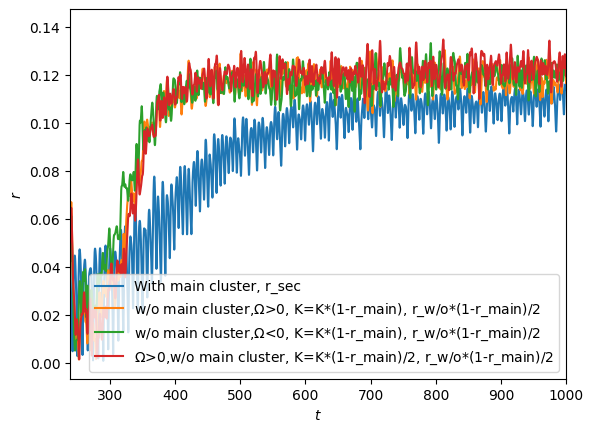

In [235]:
# plt.plot(rs_nm)
# plt.plot(rs_anm)
plt.plot(t,rs_clu[1],label='With main cluster, r_sec')

plt.plot(t[t_re:],r_nmp*(1-rs_clu_mean[0][-1])/2,label=r'w/o main cluster,$\Omega$>0, K=K*(1-r_main), r_w/o*(1-r_main)/2')
plt.plot(t[t_re:],r_nmm*(1-rs_clu_mean[0][-1])/2,label=r'w/o main cluster,$\Omega$<0, K=K*(1-r_main), r_w/o*(1-r_main)/2')
plt.plot(t[t_re:],rs_nmp_*(1-rs_clu_mean[0][-1])/2,label=r'$\Omega$>0,w/o main cluster, K=K*(1-r_main)/2, r_w/o*(1-r_main)/2')
plt.xlim(t[t_re],1000)
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$r$')

In [166]:
theta_after = np.zeros_like(theta)
dtheta_after = np.zeros_like(dtheta)

In [167]:
theta_after[:t_re] = theta[:t_re]
dtheta_after[:t_re] = dtheta[:t_re]

In [168]:
Atheta=theta_after[t_re:]
Adtheta=dtheta_after[t_re:]

In [169]:
Atheta[:,cluster[0]] = theta_anm
Adtheta[:,cluster[0]] = dtheta_anm
Atheta[:,not_main] = theta_nm
Adtheta[:,not_main] = dtheta_nm

In [170]:
theta_after[t_re:] = Atheta
dtheta_after[t_re:] = Adtheta

In [171]:
sum_time = 2000
dtheta_c_cut = np.cumsum(dtheta_after, axis=0)
avg_dtheta_CUT = (dtheta_c_cut[sum_time:]-dtheta_c_cut[:-sum_time])/sum_time
CS_CUT, CMP_CUT, cluster_CUT, omega_s_CUT, omega_e_CUT, CMO_CUT, Is_group_CUT, C_s_CUT, C_e_CUT = cluster_os_new2(
    avg_dtheta_CUT[-1000:], height=6e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS_CUT

array([621, 135, 134])

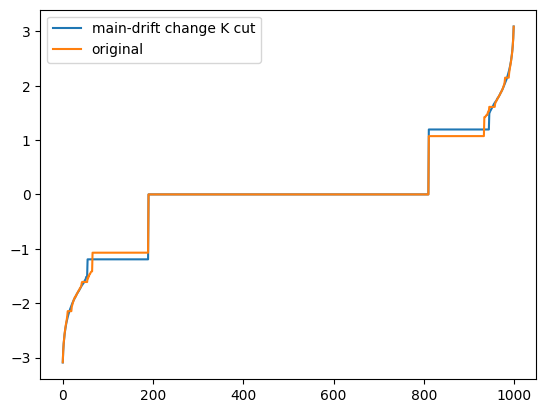

In [172]:
plt.plot(avg_dtheta_CUT[-1],label='main-drift change K cut')
# plt.plot(avg_dtheta_I[-1],label='main to Identical')
plt.plot(avg_dtheta[-1],label='original')
plt.legend()

In [173]:
rs_clu_cut = []
rs_clu_cut_mean = []
rs_clu_cut_std = []
psi_clu = []
sum_time = 1000
for clu in cluster_CUT:
    temp = 1/N*np.sum(np.exp(1j*theta_after[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu_cut.append(rc)
    rs_clu_cut_mean.append(rc_mean)
    rs_clu_cut_std.append(rc_std)
    psi_clu.append(psic)


rs_cut_mean = np.array([np.mean(rs[i:i+sum_time], axis=0)
                for i in range(len(t)-sum_time)])
rs_cut_std = np.array([np.std(rs[i:i+sum_time], axis=0)
                    for i in range(len(t)-sum_time)])


In [ ]:
2*(norm.cdf(0.3) - 0.5)

0.23582284437790513

Text(0, 0.5, '$r_{cluster}$')

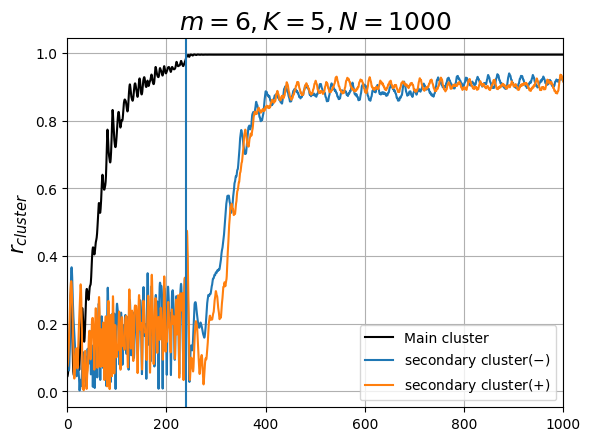

In [174]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
# ax1_ = plt.twinx()
# plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu_cut,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t[:], rc*N/CS_CUT[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t[:],rc*N/CS_CUT[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 1000)
plt.sca(ax1)
plt.axvline(t[t_arg][0])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)

In [175]:
sum_time = 500
avg_dtheta_test_CUT = (dtheta_c_cut[sum_time:]-dtheta_c_cut[:-sum_time])/sum_time

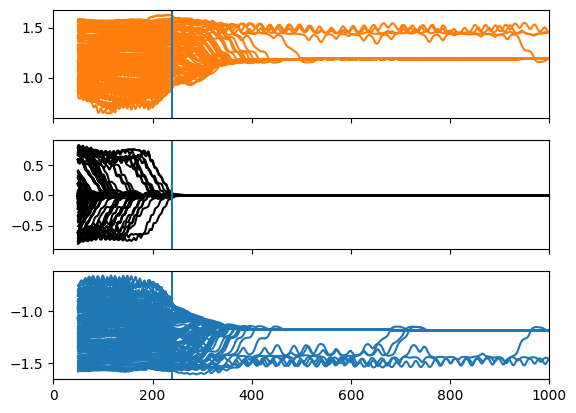

In [177]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
plt.sca(ax2)
plt.plot(t[sum_time:10000],avg_dtheta_test_CUT[sum_time:10000,cluster_CUT[0]],color='black')
plt.xlim(0, 1000)
plt.axvline(t[t_arg][0])

plt.sca(ax3)
plt.plot(t[sum_time:10000],avg_dtheta_test_CUT[sum_time:10000,cluster_CUT[1]],color='tab:blue')
plt.axvline(t[t_arg][0])

plt.sca(ax1)
plt.plot(t[sum_time:10000],avg_dtheta_test_CUT[sum_time:10000,cluster_CUT[2]],color='tab:orange')
# plt.sca(ax1)
plt.axvline(t[t_arg][0])


### 겹쳤을때 2차 클러스터가 정지함

In [83]:
t_arg, = np.where(rs_clu[2]*N/CS[2]>0.98)
t_stop = t_arg[0]
t[t_stop:].shape
t[t_stop]

2210.1

In [92]:
t_arg = np.argmax(rs[t_stop:t_stop+2000])
t_max = t_stop+t_arg
t[t_max:]
t[t_max]

2290.0

In [74]:
t[-1]

10000.0

In [121]:
# seed = 10
# theta_random, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
omega = np.sort(omega)-np.mean(omega)
Theta = np.zeros(2*N)
Theta[:N] =  theta_before[t_max]
dtheta_Break = dtheta_before[t_max]
dtheta_Break[cluster[1]] = 0
dtheta_Break[cluster[2]] = 0
Theta[N:] =  dtheta_Break
sol = RK4_jit(Kuramoto_2nd_mf,Theta, t[t_max:], args=(omega, N, m, K))
theta_break,dtheta_break = sol[:,:N],sol[:,N:2*N]
rs_break = np.abs(np.mean(np.exp(theta_break.T*1j),axis=0))


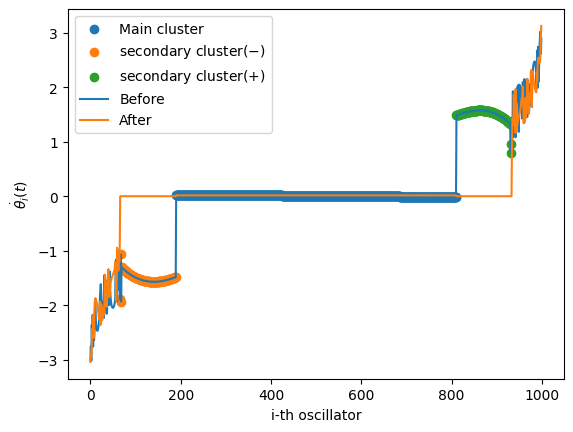

In [116]:
for clu,name in zip(cluster,names):
    plt.scatter(clu,dtheta[t_max,clu],label=name)
plt.plot(dtheta[t_max],label='Before')
plt.plot(dtheta_break[0],label='After')
plt.ylabel(r'$\dot{\theta}_i(t)$')
plt.xlabel('i-th oscillator')
plt.legend()

In [125]:
theta_B = theta.copy()
dtheta_B = dtheta.copy()

In [126]:
theta_B[t_max:]= theta_break
dtheta_B[t_max:]= dtheta_break

In [179]:
rs_B = np.abs(np.mean(np.exp(theta_B.T*1j),axis=0))

Text(0.5, 0, '$t$')

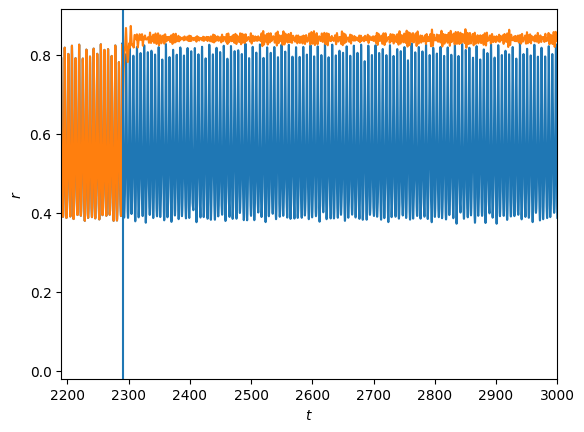

In [188]:
plt.plot(t,rs)
plt.plot(t,rs_B)
plt.xlim(t[t_max]-100,3000)
plt.axvline(t[t_max])
plt.ylabel('$r$')
plt.xlabel('$t$')

In [184]:
dtheta_B_cut = np.cumsum(dtheta_B, axis=0)
sum_time = 2000
avg_dtheta_STOP = (dtheta_B_cut[sum_time:]-dtheta_B_cut[:-sum_time])/sum_time
CS_STOP, CMP_STOP, cluster_STOP, omega_s_STOP, omega_e_STOP, CMO_STOP, Is_group_STOP, C_s_STOP, C_e_STOP = cluster_os_new2(
    avg_dtheta_STOP[-1000:], height=6e-4, c_std=3, check=1e-4, c_size=5, N=N, omega=omega)
CS_STOP

array([868])

In [185]:
rs_clu_STOP = []
rs_clu_STOP_mean = []
rs_clu_STOP_std = []
psi_clu = []
sum_time = 1000
for clu in cluster_STOP:
    temp = 1/N*np.sum(np.exp(1j*theta_B[:, clu]), axis=1)
    rc = np.abs(temp)
    rc_mean = np.array([np.mean(rc[i:i+sum_time], axis=0)
                   for i in range(len(t)-sum_time)])
    rc_std = np.array([np.std(rc[i:i+sum_time], axis=0)
                      for i in range(len(t)-sum_time)])

    psic = np.angle(temp)
    rs_clu_STOP.append(rc)
    rs_clu_STOP_mean.append(rc_mean)
    rs_clu_STOP_std.append(rc_std)
    psi_clu.append(psic)

In [ ]:
2*(norm.cdf(0.3) - 0.5)

0.23582284437790513

Text(0, 0.5, '$r_{cluster}$')

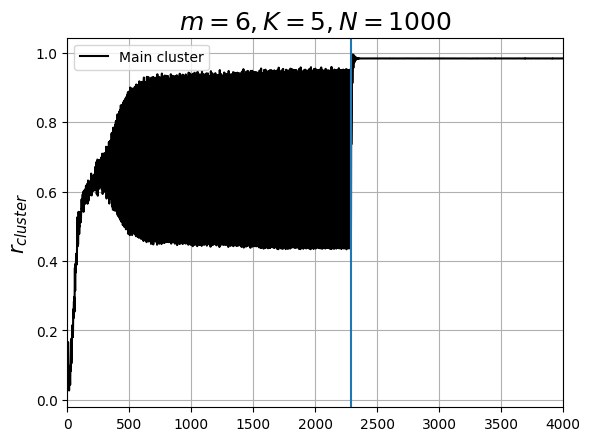

In [192]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
# ax1_ = plt.twinx()
# plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu_STOP,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t[:], rc*N/CS_STOP[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t[:],rc*N/CS_STOP[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 4000)
plt.sca(ax1)
plt.axvline(t[t_max])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)

In [194]:
sum_time = 500
avg_dtheta_STOP_TEST = (dtheta_B_cut[sum_time:]-dtheta_B_cut[:-sum_time])/sum_time

In [190]:
plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

Text(0, 0.5, '$r_{cluster}$')

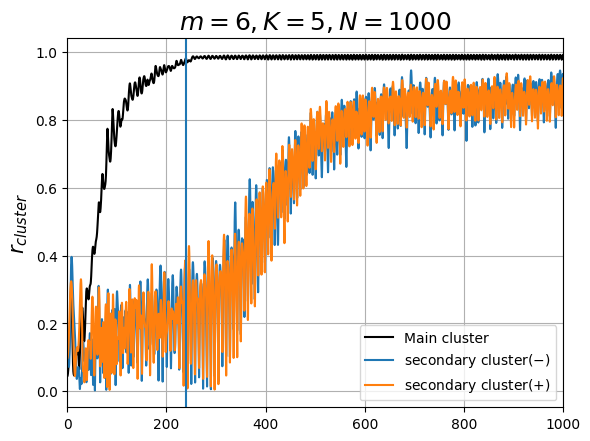

In [191]:
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)
# fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 2], dpi=500)plt.figure()

ax1 = plt.gca()
plt.sca(ax1)
plt.title(rf'$m={m},K={K},N={N}$',fontsize=18)
# ax1_ = plt.twinx()
# plt.plot(np.NAN, np.NAN, label=names[0], color='black')

num = 0 
for rc,name in zip(rs_clu,names):
    if num == 0:
        plt.sca(ax1)
        plt.plot(t, rc*N/CS[num], label=name, color='black');num+=1
    else:

        plt.sca(ax1)
        plt.plot(t,rc*N/CS[num],label=name)
        num+=1


plt.grid()
plt.legend()
plt.xlim(0, 1000)
plt.sca(ax1)
plt.axvline(t[t_arg][0])
# plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$', fontsize=15)
plt.ylabel(r'$r_{cluster}$', fontsize=15)

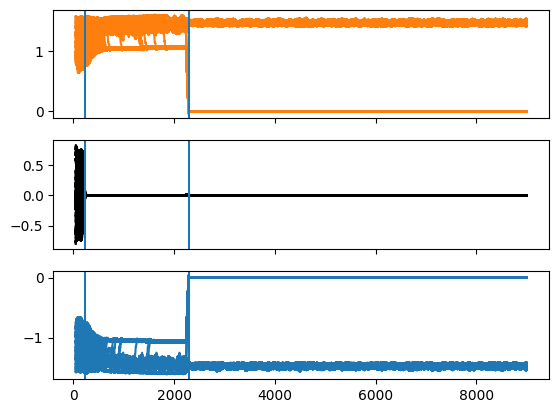

In [202]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)
plt.sca(ax2)
plt.plot(t[sum_time:90000],avg_dtheta_STOP_TEST[sum_time:90000,cluster_CUT[0]],color='black')
# plt.xlim(0, 1000)
plt.axvline(t[t_arg][0])
plt.axvline(t[t_max])

plt.sca(ax3)
plt.plot(t[sum_time:90000],avg_dtheta_STOP_TEST[sum_time:90000,cluster_CUT[1]],color='tab:blue')
plt.axvline(t[t_arg][0])
plt.axvline(t[t_max])

plt.sca(ax1)
plt.plot(t[sum_time:90000],avg_dtheta_STOP_TEST[sum_time:90000,cluster_CUT[2]],color='tab:orange')
# plt.sca(ax1)
plt.axvline(t[t_arg][0])
plt.axvline(t[t_max])


## Secondary cluster check

In [1]:
from scipy.stats import norm
om = np.mean(omega[cluster[0]])
om
O_p = lambda r,K,m: 4/np.pi * np.sqrt(K*r/m)
O_d = lambda r,K,m: K*r
r_omega = lambda o: norm.cdf(o+om) - norm.cdf(om-o) 
r_omega2 = lambda o,o0: norm.cdf(o)- norm.cdf(o0)

NameError: name 'np' is not defined

In [148]:
onp ,= np.where(omega[not_main]>0)
np.mean(omega[not_main][onp])

1.4245090596095797

In [149]:
o_ip = omega_new[N//2:]
n = len(o_ip)
y = np.arange(1,n+1)/n

In [360]:
c_last = np.sort(cluster[0])[-1]

In [507]:
cmax = max(cluster[0])

In [324]:
rsh = np.abs(np.mean(np.exp(theta.T[:N//2]*1j),axis=0))


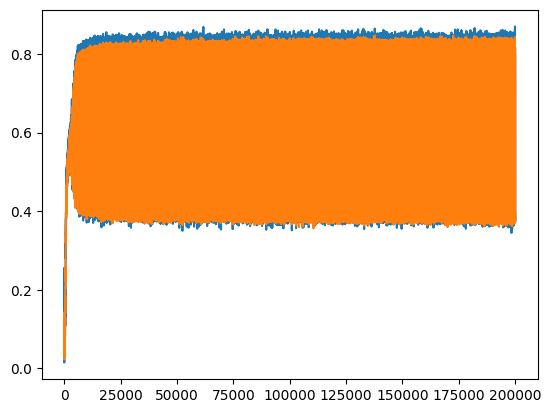

In [326]:
plt.plot(rsh)
plt.plot(rs)

In [150]:
mo = np.mean(omega[cluster[0]])
mo
omega_new = omega.copy()
omega_new[cluster[0]] = mo+0* omega[cluster[0]]

In [151]:
So = O_p(rs_clu_mean[0][-1],K=K,m=m)
Sod = O_d(rs_clu_mean[0][-1]/2,K=K,m=m)
Sop = O_p(rs_clu_mean[0][-1]+rs_clu_mean[0][-1],K=K,m=m)

In [152]:
o_ip = omega_new[N//2:]
n = len(o_ip)
omega_new2 = omega_new.copy()
# omega_new2[cluster[2]] = 1.4
# omega_new2[cluster[1]] = So
o_ip2 = omega_new2[N//2:]

A = np.where(o_ip2>=So)
o_ip2 = o_ip2[A] - So
n2 = len(o_ip2)
y = np.arange(1,n+1)/n
y2= np.arange(1,n2+1)/n2

Text(0, 0.5, '$\\left\\langle\\dot{\\theta}_i\\right\\rangle$')

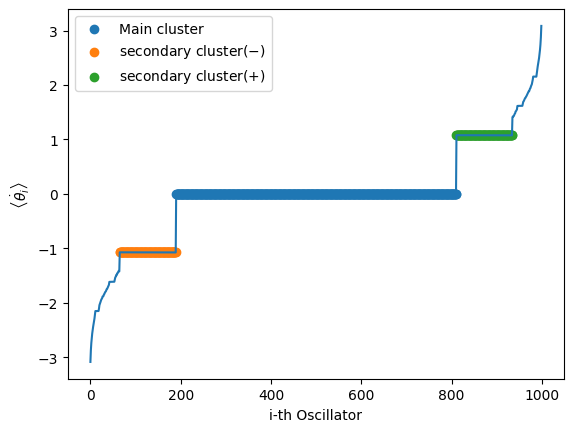

In [153]:
plt.plot(avg_dtheta[-1])
plt.xlabel('i-th Oscillator')
for clu,name in zip(cluster,names):
    plt.scatter(np.arange(N)[clu],avg_dtheta[-1][clu],label=name)
plt.legend()
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$')

In [575]:
len(A[0])

104

In [154]:
So = O_p(rs_clu_mean[0][-1],K=K,m=m)
Sod = O_d(rs_clu_mean[0][-1]/2,K=K,m=m)
Sop = O_p(rs_clu_mean[0][-1]+rs_clu_mean[0][-1],K=K,m=m)

Text(0, 0.5, '$ \\int_{-\\Omega}^{\\Omega} g(\\omega)d\\Omega ,r$')

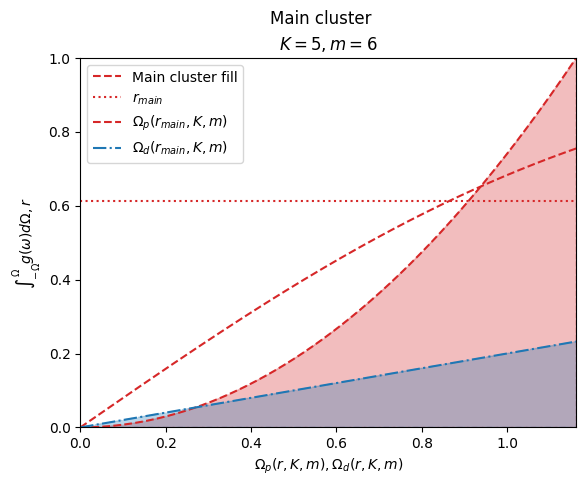

In [155]:
os = np.linspace(0,20,10000)
os2 = np.linspace(So,3,10000)
os3 = np.linspace(Sop,3,10000)
r_temp = np.linspace(0,1,100000)
plt.plot(os,r_omega(os),label='Main cluster fill',ls='--',color='tab:red')
plt.axhline(rs_clu_mean[0][-1],ls=':',label='$r_{main}$',color='tab:red')
plt.plot(O_p(r_temp,K=K,m=m),r_temp,label='$\Omega_p(r_{main},K,m)$',ls='--',color='tab:red')
plt.fill_between(O_p(r_temp,K=K,m=m),r_temp,ls='--',color='tab:red',alpha=0.3)
plt.plot(O_d(r_temp,K=K,m=m),r_temp,label='$\Omega_d(r_{main},K,m)$',ls='-.',color='tab:blue')
plt.fill_between(O_d(r_temp,K=K,m=m),r_temp,ls='-.',color='tab:blue',alpha=0.3)
plt.xlim(0,O_p(1,K=K,m=m))
plt.ylim(0,1)
plt.legend()
plt.title(rf'$K={K},m={m}$')
plt.suptitle('Main cluster')
plt.xlabel(r'$\Omega_p(r,K,m),\Omega_d(r,K,m)$')
plt.ylabel(r'$ \int_{-\Omega}^{\Omega} g(\omega)d\Omega ,r$')
# plt.plot(o_ip,y)
# plt.plot(o_ip2,y[A]/2-y[A][0]/2)

# plt.axhline(0.1106224702298641)

# plt.axhline(0.6114135742187501)
# plt.axhline(0.1106224702298641)
# plt.axhline(rs_clu_mean[0][-1]/2+rs_clu_mean[1][-1])
# plt.axhline(rs_clu_mean[1][-1],ls=':')
# plt.axhline(rs_clu_mean[0][-1]/2)
# plt.axhline(Sod,color='red')
# plt.axhline(Sop,color='red')
# plt.axhline(So,color='red')
# plt.axhline(Sod,color='red')

In [156]:
SO = norm.ppf(rs_clu_mean[0][-1]/2+0.5)

In [157]:
SO,So

(0.8634493726910663, 0.9093562908042568)

In [138]:
O_d(rs_clu_mean[0][-1],K,m)

3.897292794131106

In [163]:
K = 7
m = 6

Text(0.5, 0.98, 'Secondary cluster')

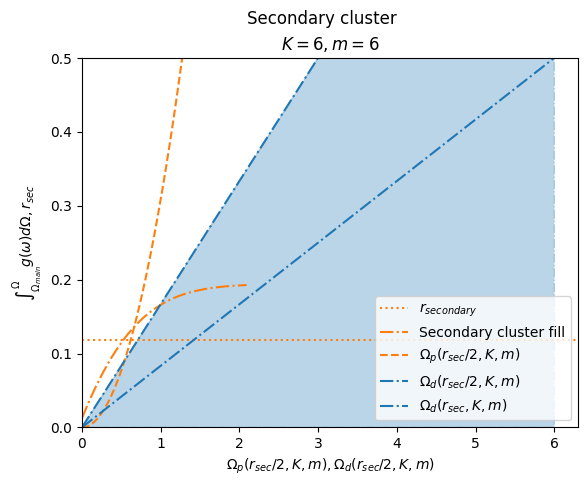

In [165]:

plt.axhline(rs_clu_mean[1][-1],ls=':',label='$r_{secondary}$',color='tab:orange')
# plt.axhline(np.nan,ls=':',label='$r_{secondary}$',color='tab:orange')
# plt.plot(O_d(r_temp,K=K,m=m),r_temp/2)
plt.plot(os2-So,r_omega2(os2,o0=SO),label='Secondary cluster fill',ls='-.',color='tab:orange')
# plt.plot(os2-So,r_omega2(os2,o0=SO)*2,label='Secondary cluster fill',ls='-.',color='tab:orange')

# plt.plot(os,r_omega(os),label='Main cluster fill',ls='--',color='tab:red')
# plt.axhline(rs_clu_mean[0][-1],ls=':',label='$r_{main}$',color='tab:red')
plt.plot(O_p(r_temp,K=K,m=m),r_temp/2,label='$\Omega_p(r_{sec}/2,K,m)$',ls='--',color='tab:orange')
# plt.fill_between(O_p(r_temp,K=K,m=m),r_temp/2,ls='--',color='tab:orange',alpha=0.3)
plt.plot(O_d(r_temp,K=K,m=m),r_temp/2,label='$\Omega_d(r_{sec}/2,K,m)$',ls='-.',color='tab:blue')
# plt.fill_between(O_d(r_temp,K=K,m=m),r_temp/2,ls='-.',color='tab:blue',alpha=0.3)

# plt.plot(O_p(r_temp,K=K,m=m),r_temp,label='$\Omega_p(r_{sec},K,m)$',ls='--',color='tab:orange')
# plt.fill_between(O_p(r_temp,K=K,m=m),r_temp,ls='--',color='tab:orange',alpha=0.3)
plt.plot(O_d(r_temp,K=K,m=m),r_temp,label='$\Omega_d(r_{sec},K,m)$',ls='-.',color='tab:blue')
plt.fill_between(O_d(r_temp,K=K,m=m),r_temp,ls='-.',color='tab:blue',alpha=0.3)

plt.legend()
plt.xlim(0,)
plt.ylim(0,0.5)
plt.xlabel(r'$\Omega_p(r_{sec}/2,K,m),\Omega_d(r_{sec}/2,K,m)$')
plt.ylabel(r'$ \int_{\Omega_{main}}^{\Omega} g(\omega)d\Omega,r_{sec} $')
plt.title(rf'$K={K},m={m}$')
plt.suptitle('Secondary cluster')

# plt.axhline(0.6114135742187501)

# plt.plot(os3-Sop,r_omega2(os3,o0=Sop))